# **Import Library**

In [58]:
import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, davies_bouldin_score
from yellowbrick.cluster import KElbowVisualizer

# **Load Data**

In [59]:
# URL Google Sheets dalam format CSV
url = "https://docs.google.com/spreadsheets/d/188yRPLfbuGmT3A6WIJe-8pAUtBTljdutDD7HxG-iGSI/export?format=csv"
data = pd.read_csv(url)

# Menampilkan beberapa baris pertama data
data.head()

,Invoice Date,Ar Invoice No,OrderDate,Mr No,Name,Birth Date,Address,Payer,Primary Doctor,Admission Type,...,Discount,Is Tax Inclusive,Item Taxable Amount,Tax,Item Net Amount,Total Batch Cost,ProcedureRoom,VisitType,Category,Use
0,2024-01-01 00:16:45,OIV2401010001,2023-12-31 22:41:29,49575.0,SUMINAH.NY,1968-11-10 00:00:00,-,KARYAWAN YPK,NaN,Rawat Jalan,...,0.0,True,16694.4000,1836.3840,18530.7840,13912.0,NaN,NaN,Obat,Neuropati
1,2024-01-01 04:06:33,EIV2401010001,2024-01-01 04:01:50,119839.0,"ANSYE PORRY, NY",1947-08-11 00:00:00,JL KANTIN NO 8,Pribadi,dr.Vebrianty Rantelino,Rawat Darurat,...,0.0,True,18918.9000,2081.0790,20999.9790,12285.0,NaN,NaN,Obat,"GERD, tukak lambung, ulkus duodenum"
2,2024-01-01 06:59:37,EIV2401010004,2023-12-31 22:10:02,90003303.0,"MOHAMAD ZUBIR, TN",1979-01-15 00:00:00,KAV DKI BLOK A 5/13,Pribadi,dr. Danti Meirani,Rawat Darurat,...,0.0,True,9624.3838,1058.6822,10683.0660,6249.6,NaN,NaN,Obat,"Nyeri, Demam"
3,2024-01-01 06:59:37,EIV2401010004,2023-12-31 22:10:02,90003303.0,"MOHAMAD ZUBIR, TN",1979-01-15 00:00:00,KAV DKI BLOK A 5/13,Pribadi,dr. Danti Meirani,Rawat Darurat,...,0.0,True,61600.0000,6776.0000,68376.0000,40000.0,NaN,NaN,Obat,Suplementasi vitamin
4,2024-01-01 06:59:37,EIV2401010004,2023-12-31 22:15:53,90003303.0,"MOHAMAD ZUBIR, TN",1979-01-15 00:00:00,KAV DKI BLOK A 5/13,Pribadi,dr. Danti Meirani,Rawat Darurat,...,0.0,True,21424.4800,2356.6928,23781.1728,13249.0,NaN,NaN,Obat,Neuropati


In [60]:
# Cek Informasi Data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127497 entries, 0 to 127496
Data columns (total 28 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Invoice Date         127497 non-null  object 
 1   Ar Invoice No        127497 non-null  object 
 2   OrderDate            127497 non-null  object 
 3   Mr No                120735 non-null  float64
 4   Name                 127497 non-null  object 
 5   Birth Date           127497 non-null  object 
 6   Address              120748 non-null  object 
 7   Payer                127497 non-null  object 
 8   Primary Doctor       117863 non-null  object 
 9   Admission Type       127497 non-null  object 
 10  Package              927 non-null     object 
 11  Item                 127497 non-null  object 
 12  Unit                 127497 non-null  object 
 13  Supplier             127497 non-null  object 
 14  Qty                  127497 non-null  float64
 15  Purchase Price   

# **Preprocessing Data**

## **Data Selection**

In [61]:
# Seleksi kolom yang diinginkan (item, qty, sales price, item amount)
selected_columns = ['Invoice Date', 'Item', 'Qty', 'Item Amount', 'Supplier','Use']
data_selected = data[selected_columns]
data_selected

,Invoice Date,Item,Qty,Item Amount,Supplier,Use
0,2024-01-01 00:16:45,NEUROBION INJ 5000 (20 AMPUL/BOX),1.0,18530.7840,P&G ( PROCTER & GAMBLE ),Neuropati
1,2024-01-01 04:06:33,LANSOPRAZOL CAPSUL 30 MG,10.0,20999.9790,OGB,"GERD, tukak lambung, ulkus duodenum"
2,2024-01-01 06:59:37,SUMAGESIC TAB,12.0,10683.0660,UAP,"Nyeri, Demam"
3,2024-01-01 06:59:37,ZEGAVIT ( 60 TAB/BOX ),10.0,68376.0000,KALBE FARMA,Suplementasi vitamin
4,2024-01-01 06:59:37,NEUROBION INJ 5000 (20 AMPUL/BOX),1.0,23781.1728,P&G ( PROCTER & GAMBLE ),Neuropati
...,...,...,...,...,...,...
127492,2024-12-31 19:26:29,METFORMIN 500 MG,60.0,28205.1000,OGB,Diabetes melitus tipe 2
127493,2024-12-31 19:26:29,NEUROBION FORTE 5000MG TAB (250 TAB/BOX),20.0,126939.3600,P&G ( PROCTER & GAMBLE ),Neuropati
127494,2024-12-31 21:07:15,ILIADIN SPRAY DWS 0.05%,1.0,93602.3040,P&G ( PROCTER & GAMBLE ),Hidung tersumbat
127495,2024-12-31 23:03:20,OXYTETRACYCLIN SALEP MATA 1%,1.0,70310.2544,OGB,Infeksi bakteri pada mata


## **Data Cleaning**

In [62]:
# Cek missing values
print("\nMissing Values:")
print(data_selected.isnull().sum())


Missing Values:
Invoice Date    0
Item            0
Qty             0
Item Amount     0
Supplier        0
Use             0
dtype: int64


In [63]:
# Hapus baris yang mengandung kata 'Racikan' di kolom 'Item'
data_selected = data_selected[~data_selected['Item'].str.contains('Racikan', case=False, na=False)]
data_selected

,Invoice Date,Item,Qty,Item Amount,Supplier,Use
0,2024-01-01 00:16:45,NEUROBION INJ 5000 (20 AMPUL/BOX),1.0,18530.7840,P&G ( PROCTER & GAMBLE ),Neuropati
1,2024-01-01 04:06:33,LANSOPRAZOL CAPSUL 30 MG,10.0,20999.9790,OGB,"GERD, tukak lambung, ulkus duodenum"
2,2024-01-01 06:59:37,SUMAGESIC TAB,12.0,10683.0660,UAP,"Nyeri, Demam"
3,2024-01-01 06:59:37,ZEGAVIT ( 60 TAB/BOX ),10.0,68376.0000,KALBE FARMA,Suplementasi vitamin
4,2024-01-01 06:59:37,NEUROBION INJ 5000 (20 AMPUL/BOX),1.0,23781.1728,P&G ( PROCTER & GAMBLE ),Neuropati
...,...,...,...,...,...,...
127492,2024-12-31 19:26:29,METFORMIN 500 MG,60.0,28205.1000,OGB,Diabetes melitus tipe 2
127493,2024-12-31 19:26:29,NEUROBION FORTE 5000MG TAB (250 TAB/BOX),20.0,126939.3600,P&G ( PROCTER & GAMBLE ),Neuropati
127494,2024-12-31 21:07:15,ILIADIN SPRAY DWS 0.05%,1.0,93602.3040,P&G ( PROCTER & GAMBLE ),Hidung tersumbat
127495,2024-12-31 23:03:20,OXYTETRACYCLIN SALEP MATA 1%,1.0,70310.2544,OGB,Infeksi bakteri pada mata


In [64]:
# Hapus data return (qty <= 0)
data_selected = data_selected[data_selected['Qty'] > 0]
data_selected

,Invoice Date,Item,Qty,Item Amount,Supplier,Use
0,2024-01-01 00:16:45,NEUROBION INJ 5000 (20 AMPUL/BOX),1.0,18530.7840,P&G ( PROCTER & GAMBLE ),Neuropati
1,2024-01-01 04:06:33,LANSOPRAZOL CAPSUL 30 MG,10.0,20999.9790,OGB,"GERD, tukak lambung, ulkus duodenum"
2,2024-01-01 06:59:37,SUMAGESIC TAB,12.0,10683.0660,UAP,"Nyeri, Demam"
3,2024-01-01 06:59:37,ZEGAVIT ( 60 TAB/BOX ),10.0,68376.0000,KALBE FARMA,Suplementasi vitamin
4,2024-01-01 06:59:37,NEUROBION INJ 5000 (20 AMPUL/BOX),1.0,23781.1728,P&G ( PROCTER & GAMBLE ),Neuropati
...,...,...,...,...,...,...
127492,2024-12-31 19:26:29,METFORMIN 500 MG,60.0,28205.1000,OGB,Diabetes melitus tipe 2
127493,2024-12-31 19:26:29,NEUROBION FORTE 5000MG TAB (250 TAB/BOX),20.0,126939.3600,P&G ( PROCTER & GAMBLE ),Neuropati
127494,2024-12-31 21:07:15,ILIADIN SPRAY DWS 0.05%,1.0,93602.3040,P&G ( PROCTER & GAMBLE ),Hidung tersumbat
127495,2024-12-31 23:03:20,OXYTETRACYCLIN SALEP MATA 1%,1.0,70310.2544,OGB,Infeksi bakteri pada mata


In [65]:
# Cek data duplicate
print("\nDuplikat Data:", data_selected.duplicated().sum())


Duplikat Data: 3365


In [66]:
# Menampilkan baris data duplikat
data_selected_duplicated = data_selected[data_selected.duplicated()]

# Menampilkan hasil
data_selected_duplicated

,Invoice Date,Item,Qty,Item Amount,Supplier,Use
155,2024-01-02 11:29:51,AMARYL 1 MG TAB (50 TAB/BOX),10.0,51408.806,SANOFI,Diabetes
186,2024-01-02 11:58:20,VICCILLIN 1 GR INJ,1.0,19560.000,MEIJI,Infeksi bakteri
228,2024-01-02 13:51:24,SIRPLUS TAB 20GR (200 TAB/BOTOL),2.0,652.000,MEPROFARM,Pelarut Obat
233,2024-01-02 13:51:24,KENACORT 4 MG TAB,1.0,8557.500,TAISHO,"Peradangan, Alergi"
245,2024-01-02 13:51:24,KENACORT 4 MG TAB,3.0,25672.500,TAISHO,"Peradangan, Alergi"
...,...,...,...,...,...,...
127335,2024-12-31 13:56:23,OMEPRAZOLE 40MG INJ (MBF),1.0,10800.000,OGB,"Asam lambung berlebih, GERD, tukak lambung"
127336,2024-12-31 13:56:23,INFUSAN RL,1.0,9187.200,WIDATRA,Rehidrasi
127342,2024-12-31 13:56:23,ASAM TRANEXAMAT INJ,3.0,16920.000,OGB,Antifibrinolitik
127355,2024-12-31 14:26:24,LIDOCAIN 2%,1.0,2445.000,OGB,Anestesi lokal


## **Data Transformation**

In [67]:
# Ekstrak bulan
data_selected['Month'] = pd.to_datetime(data_selected['Invoice Date']).dt.month
data_selected

/tmp/ipython-input-67-2834365553.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_selected['Month'] = pd.to_datetime(data_selected['Invoice Date']).dt.month


,Invoice Date,Item,Qty,Item Amount,Supplier,Use,Month
0,2024-01-01 00:16:45,NEUROBION INJ 5000 (20 AMPUL/BOX),1.0,18530.7840,P&G ( PROCTER & GAMBLE ),Neuropati,1
1,2024-01-01 04:06:33,LANSOPRAZOL CAPSUL 30 MG,10.0,20999.9790,OGB,"GERD, tukak lambung, ulkus duodenum",1
2,2024-01-01 06:59:37,SUMAGESIC TAB,12.0,10683.0660,UAP,"Nyeri, Demam",1
3,2024-01-01 06:59:37,ZEGAVIT ( 60 TAB/BOX ),10.0,68376.0000,KALBE FARMA,Suplementasi vitamin,1
4,2024-01-01 06:59:37,NEUROBION INJ 5000 (20 AMPUL/BOX),1.0,23781.1728,P&G ( PROCTER & GAMBLE ),Neuropati,1
...,...,...,...,...,...,...,...
127492,2024-12-31 19:26:29,METFORMIN 500 MG,60.0,28205.1000,OGB,Diabetes melitus tipe 2,12
127493,2024-12-31 19:26:29,NEUROBION FORTE 5000MG TAB (250 TAB/BOX),20.0,126939.3600,P&G ( PROCTER & GAMBLE ),Neuropati,12
127494,2024-12-31 21:07:15,ILIADIN SPRAY DWS 0.05%,1.0,93602.3040,P&G ( PROCTER & GAMBLE ),Hidung tersumbat,12
127495,2024-12-31 23:03:20,OXYTETRACYCLIN SALEP MATA 1%,1.0,70310.2544,OGB,Infeksi bakteri pada mata,12


In [68]:
# Total Qty per item per bulan (untuk melihat fluktuasi per bulan)
qty_bulanan = data_selected.groupby(['Item', 'Month'])['Qty'].sum().reset_index()

# Hitung mean, std, dan CV per item
stabilitas = qty_bulanan.groupby('Item')['Qty'].agg(['mean', 'std']).reset_index()
stabilitas['CV (%)'] = (stabilitas['std'] / stabilitas['mean']) * 100

# Simpan hanya kolom 'Item' dan 'CV (%)'
stabilitas = stabilitas[['Item', 'CV (%)']]

# Hitung jumlah bulan kemunculan per item
bulan_aktif = qty_bulanan.groupby('Item')['Month'].nunique().reset_index()
bulan_aktif.rename(columns={'Month': 'Jumlah Bulan Muncul'}, inplace=True)

# Gabungkan ke stabilitas
stabilitas = stabilitas.merge(bulan_aktif, on='Item', how='left')

# Gabungkan stabilitas (hanya kolom 'CV (%)' dan 'Jumlah Bulan Muncul')
data_selected = data_selected.merge(stabilitas, on='Item', how='left')

In [69]:
data_selected

,Invoice Date,Item,Qty,Item Amount,Supplier,Use,Month,CV (%),Jumlah Bulan Muncul
0,2024-01-01 00:16:45,NEUROBION INJ 5000 (20 AMPUL/BOX),1.0,18530.7840,P&G ( PROCTER & GAMBLE ),Neuropati,1,13.518807,12
1,2024-01-01 04:06:33,LANSOPRAZOL CAPSUL 30 MG,10.0,20999.9790,OGB,"GERD, tukak lambung, ulkus duodenum",1,26.873509,12
2,2024-01-01 06:59:37,SUMAGESIC TAB,12.0,10683.0660,UAP,"Nyeri, Demam",1,29.604279,12
3,2024-01-01 06:59:37,ZEGAVIT ( 60 TAB/BOX ),10.0,68376.0000,KALBE FARMA,Suplementasi vitamin,1,44.072152,12
4,2024-01-01 06:59:37,NEUROBION INJ 5000 (20 AMPUL/BOX),1.0,23781.1728,P&G ( PROCTER & GAMBLE ),Neuropati,1,13.518807,12
...,...,...,...,...,...,...,...,...,...
114278,2024-12-31 19:26:29,METFORMIN 500 MG,60.0,28205.1000,OGB,Diabetes melitus tipe 2,12,29.711225,12
114279,2024-12-31 19:26:29,NEUROBION FORTE 5000MG TAB (250 TAB/BOX),20.0,126939.3600,P&G ( PROCTER & GAMBLE ),Neuropati,12,52.058390,12
114280,2024-12-31 21:07:15,ILIADIN SPRAY DWS 0.05%,1.0,93602.3040,P&G ( PROCTER & GAMBLE ),Hidung tersumbat,12,69.719029,12
114281,2024-12-31 23:03:20,OXYTETRACYCLIN SALEP MATA 1%,1.0,70310.2544,OGB,Infeksi bakteri pada mata,12,27.499163,12


In [70]:
# Cek Missing Values & Data Duplikat
print("\nMissing Values:")
print(data_selected.isnull().sum())
print("\nDuplikat Data:", data_selected.duplicated().sum())


Missing Values:
Invoice Date             0
Item                     0
Qty                      0
Item Amount              0
Supplier                 0
Use                      0
Month                    0
CV (%)                 332
Jumlah Bulan Muncul      0
dtype: int64

Duplikat Data: 3365


In [71]:
# Tampilkan baris yang CV (%) -nya kosong
data_selected[data_selected['CV (%)'].isnull()]

,Invoice Date,Item,Qty,Item Amount,Supplier,Use,Month,CV (%),Jumlah Bulan Muncul
162,2024-01-02 11:44:20,RECANSA 20 MG,10.0,109076.814,SANOFI,Disfungsi ereksi,1,NaN,1
271,2024-01-02 14:35:57,TETRACYCLINE 500 MG TAB,10.0,14271.314,OGB,Infeksi bakteri,1,NaN,1
361,2024-01-03 08:38:39,TAMSULOSIN HCL 0.4 MG TAB,30.0,265067.865,OGB,Pembesaran prostat,1,NaN,1
442,2024-01-03 11:47:19,BIOBRAN,1.0,17115.000,FERRON,Imunomodulator,1,NaN,1
651,2024-01-04 09:29:57,BIOBRAN,4.0,71794.800,FERRON,Imunomodulator,1,NaN,1
...,...,...,...,...,...,...,...,...,...
114151,2024-12-31 13:56:23,CEFOPERAZONE 1 GRAM INJ,3.0,605399.976,YARINDO,Infeksi bakteri,12,NaN,1
114241,2024-12-31 17:24:46,CANDOTENS 16 MG,20.0,393162.000,NOVELL,Hipertensi,12,NaN,1
114259,2024-12-31 18:07:17,BUDESMA 0.25 MG NEBULES,1.0,20912.400,DEXA MEDICA,Asma,12,NaN,1
114260,2024-12-31 18:07:17,BUDESMA 0.25 MG NEBULES,2.0,37680.000,DEXA MEDICA,Asma,12,NaN,1


In [72]:
# Baris yang CV (%) dan StdDev -nya kosong diisi = item hanya terjual 1 bulan tertentu, "Data Tidak Cukup"

# Isi nilai NaN di kolom CV (%)
data_selected['CV (%)'] = data_selected['CV (%)'].fillna(80)


In [73]:
# Menampilkan baris data duplikat
data_selected_duplicated = data_selected[data_selected.duplicated()]

# Menampilkan hasil
data_selected_duplicated

,Invoice Date,Item,Qty,Item Amount,Supplier,Use,Month,CV (%),Jumlah Bulan Muncul
148,2024-01-02 11:29:51,AMARYL 1 MG TAB (50 TAB/BOX),10.0,51408.806,SANOFI,Diabetes,1,25.279148,12
179,2024-01-02 11:58:20,VICCILLIN 1 GR INJ,1.0,19560.000,MEIJI,Infeksi bakteri,1,72.332565,3
217,2024-01-02 13:51:24,SIRPLUS TAB 20GR (200 TAB/BOTOL),2.0,652.000,MEPROFARM,Pelarut Obat,1,32.179436,12
221,2024-01-02 13:51:24,KENACORT 4 MG TAB,1.0,8557.500,TAISHO,"Peradangan, Alergi",1,48.439937,12
230,2024-01-02 13:51:24,KENACORT 4 MG TAB,3.0,25672.500,TAISHO,"Peradangan, Alergi",1,48.439937,12
...,...,...,...,...,...,...,...,...,...
114145,2024-12-31 13:56:23,OMEPRAZOLE 40MG INJ (MBF),1.0,10800.000,OGB,"Asam lambung berlebih, GERD, tukak lambung",12,57.192785,12
114146,2024-12-31 13:56:23,INFUSAN RL,1.0,9187.200,WIDATRA,Rehidrasi,12,22.059251,12
114152,2024-12-31 13:56:23,ASAM TRANEXAMAT INJ,3.0,16920.000,OGB,Antifibrinolitik,12,63.111572,12
114164,2024-12-31 14:26:24,LIDOCAIN 2%,1.0,2445.000,OGB,Anestesi lokal,12,15.226370,12


In [74]:
data_month = data_selected[['Item', 'Month']].drop_duplicates()

# 2. Hilangkan 'Month' untuk keperluan klasterisasi
data_no_month = data_selected.drop(columns=['Month'])

# 3. Grouping: pastikan tidak ada duplikat, satu item = satu baris
data_grouped = data_no_month.groupby(
    ['Item', 'Supplier', 'Use', 'CV (%)', 'Jumlah Bulan Muncul'],
    as_index=False
)[['Qty', 'Item Amount']].sum()

data_grouped

,Item,Supplier,Use,CV (%),Jumlah Bulan Muncul,Qty,Item Amount
0,AAV SALEP,DIPA PHARMALAB,Anti jamur,0.000000,3,3.0,1.112491e+04
1,ABBOTIC SYR 125MG/5ML 60ML,ABBOTT,"Infeksi Saluran Pernapasan, Infeksi kulit",34.992711,6,7.0,2.061285e+06
2,ABBOTIC SYR 250MG/5ML 50ML,ABBOTT,"Infeksi Saluran Pernapasan, Infeksi kulit",35.355339,5,10.0,3.781373e+06
3,ACARBOSE 50 MG TAB,OGB,Diabetes,80.000000,1,150.0,2.397600e+05
4,ACARBOSE 50 MG TAB ( 30 TAB/BOX ) IMC,OGB,Diabetes,59.608024,5,790.0,1.283116e+06
...,...,...,...,...,...,...,...
1289,ZITROLIN ( 6 TAB/BOX ),OTTO,Infeksi bakteri,106.111264,11,131.0,8.938200e+06
1290,ZOLMIA TAB,FAHRENHEIT,Migrain,80.000000,1,3.0,6.357000e+04
1291,ZOLTA 10 MG,NOVELL,Disfungsi ereksi,80.000000,1,20.0,3.145296e+05
1292,ZOTER CREAM 5 GR,INTERBAT,Anti jamur,80.000000,1,2.0,2.355553e+05


In [75]:
# Cek Missing Values & Data Duplikat
print("\nMissing Values:")
print(data_grouped.isnull().sum())
print("\nDuplikat Data:", data_grouped.duplicated().sum())


Missing Values:
Item                   0
Supplier               0
Use                    0
CV (%)                 0
Jumlah Bulan Muncul    0
Qty                    0
Item Amount            0
dtype: int64

Duplikat Data: 0


## **Data Log**

In [76]:
# Hindari log(0) dengan menambahkan 1 (atau nilai kecil lain)
data_grouped['Qty_log'] = np.log1p(data_grouped['Qty'])  # log(1 + Qty)
data_grouped['Item Amount_log'] = np.log1p(data_grouped['Item Amount'])
data_grouped['CV (%)_log'] = np.log1p(data_grouped['CV (%)'])

## **Normalisasi Data**

In [77]:
# Data Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data_grouped[['Qty_log', 'Item Amount_log', 'CV (%)_log', 'Jumlah Bulan Muncul']])

# Membuat DataFrame baru yang rapi dengan nama kolom yang sesuai
df_scaled = pd.DataFrame(X_scaled, columns=['Qty_log', 'Item Amount_log', 'CV (%)_log', 'Jumlah Bulan Muncul'])

# Menampilkan dataframe rapi
df_scaled

,Qty_log,Item Amount_log,CV (%)_log,Jumlah Bulan Muncul
0,-1.476752,-2.324625,-4.340339,-1.024589
1,-1.160801,-0.118440,-0.317257,-0.340825
2,-1.015644,0.137912,-0.306002,-0.568746
3,0.178326,-1.027412,0.593423,-1.480431
4,0.933173,-0.318718,0.267808,-0.568746
...,...,...,...,...
1289,0.117028,0.501361,0.907134,0.798781
1290,-1.476752,-1.588268,0.593423,-1.480431
1291,-0.720898,-0.912731,0.593423,-1.480431
1292,-1.607884,-1.034887,0.593423,-1.480431


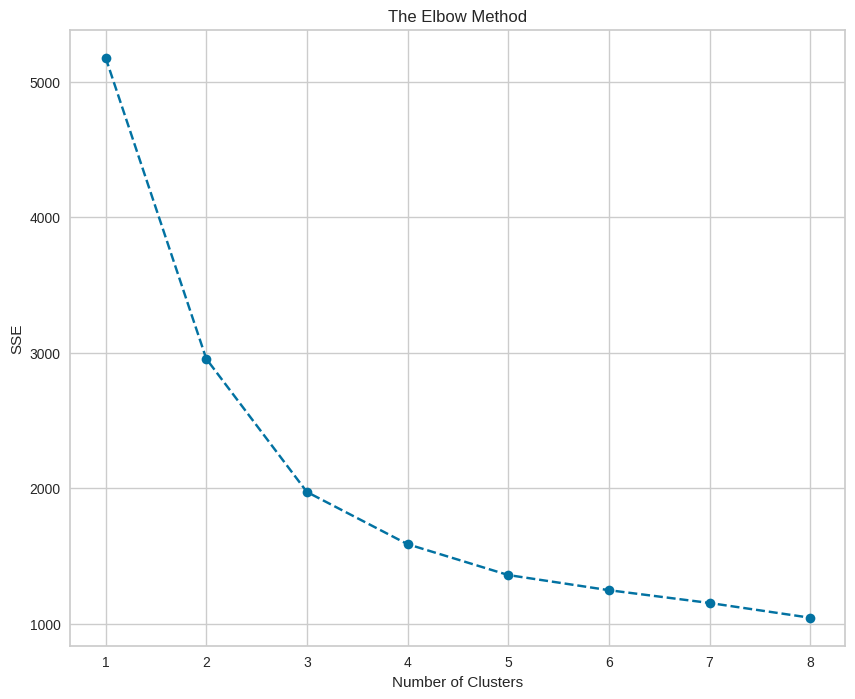

In [78]:
# Elbow Method untuk Menentukan K Optimal
sse = []
K_range = range(1, 9)
for k in K_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    sse.append(kmeans.inertia_)

plt.figure(figsize=(10, 8))
plt.plot(K_range, sse, marker='o', linestyle='--')
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.show()

In [79]:
# Menentukan jumlah cluster optimal dengan metode elbow
sse = []
sse_diff = []
k_range = range(1, 9)

for k in k_range:
  kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
  kmeans.fit(X_scaled)
  sse.append(kmeans.inertia_)

# Selisih penurunan SSE
for i in range(1, len(sse)):
  selisih = sse[i-1] - sse[i]
  sse_diff.append(selisih)

# DataFrame hasil SSE
sse_df = pd.DataFrame({
    'Jumlah Cluster (k)': list(k_range),
    'SSE': sse,
    'Selisih SSE': [None] + sse_diff
})

sse_df

,Jumlah Cluster (k),SSE,Selisih SSE
0,1,5176.000000,NaN
1,2,2954.480211,2221.519789
2,3,1971.915739,982.564472
3,4,1586.699960,385.215779
4,5,1359.137251,227.562709
5,6,1247.362382,111.774869
6,7,1153.002646,94.359736
7,8,1044.164321,108.838325


# **K-Means**

In [80]:
# Centroid awal
k = 3
np.random.seed(42)
random_indices = np.random.choice(len(X_scaled), size=k, replace=False)
initial_centroids = X_scaled[random_indices]

# Tampilkan centroid awal
print("Centroid awal:")
print(initial_centroids)

Centroid awal:
[[-0.28202865  0.21492765  0.44473379  1.02670258]
 [-0.12277604 -0.08539281 -0.13127617 -0.56874638]
 [ 0.26842146 -1.95886524  0.23976759 -0.11290382]]


In [81]:
# K-Means Clustering dengan penyesuaian label cluster mulai dari 1
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans.fit(X_scaled)

# Tambahkan 1 ke setiap label agar mulai dari 1, bukan 0
data_grouped["Cluster"] = kmeans.labels_ + 1

# Tampilkan hasil
print(data_grouped[["Item", "Cluster"]].head())

# Tampilkan jumlah item dalam setiap cluster
print("\nJumlah item dalam setiap cluster:")
print(data_grouped["Cluster"].value_counts())

                                    Item  Cluster
0                              AAV SALEP        3
1             ABBOTIC SYR 125MG/5ML 60ML        2
2             ABBOTIC SYR 250MG/5ML 50ML        2
3                     ACARBOSE 50 MG TAB        2
4  ACARBOSE 50 MG TAB ( 30 TAB/BOX ) IMC        1

Jumlah item dalam setiap cluster:
Cluster
1    742
2    502
3     50
Name: count, dtype: int64


In [82]:
# Menampilkan rata-rata fitur per cluster
available_features = ['Qty', 'Item Amount', 'CV (%)', 'Jumlah Bulan Muncul']
print("\nRata-rata fitur per cluster:")
print(data_grouped.groupby("Cluster")[available_features].mean())


Rata-rata fitur per cluster:
                 Qty   Item Amount     CV (%)  Jumlah Bulan Muncul
Cluster                                                           
1        1369.741078  3.720687e+07  51.287785            10.731806
2          35.766932  1.691135e+06  75.724780             3.185259
3          66.720000  2.412678e+06   0.155470             2.740000


In [83]:
# List untuk menyimpan hasil evaluasi
results = []

# Uji nilai K dari 2 sampai 8
for k in range(2, 9):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_scaled)

    # Hitung metrik evaluasi
    silhouette_avg = silhouette_score(X_scaled, labels)
    dbi = davies_bouldin_score(X_scaled, labels)
    cluster_counts = np.bincount(labels)

    # Simpan hasil ke dalam list sebagai dict
    results.append({
        'K': k,
        'Silhouette Score': round(silhouette_avg, 4),
        'Davies-Bouldin Index': round(dbi, 4),
        'Distribusi per Cluster': cluster_counts.tolist()
    })

# Ubah hasil menjadi DataFrame
df_results = pd.DataFrame(results)

# Tampilkan seluruh DataFrame
pd.set_option('display.max_colwidth', None)
df_results

,K,Silhouette Score,Davies-Bouldin Index,Distribusi per Cluster
0,2,0.4226,0.9951,"[747, 547]"
1,3,0.4630,0.7207,"[742, 502, 50]"
2,4,0.3257,1.0080,"[437, 402, 405, 50]"
3,5,0.2884,1.0844,"[375, 50, 259, 341, 269]"
4,6,0.2627,1.1681,"[280, 257, 50, 221, 224, 262]"
5,7,0.2860,1.0534,"[256, 311, 50, 341, 205, 4, 127]"
6,8,0.2805,1.0609,"[203, 252, 50, 193, 196, 229, 167, 4]"


In [84]:
# Menampilkan data dari setiap cluster
for i in range(1, 4):
    cluster_df = data_grouped[data_grouped['Cluster'] == i].copy()
    cluster_df = cluster_df[['Item', 'Qty', 'Item Amount', 'Supplier', 'Use', 'CV (%)', 'Jumlah Bulan Muncul','Cluster']]
    print(f"Data untuk Cluster {i}")
    display(cluster_df.head())

Data untuk Cluster 1


,Item,Qty,Item Amount,Supplier,Use,CV (%),Jumlah Bulan Muncul,Cluster
4,ACARBOSE 50 MG TAB ( 30 TAB/BOX ) IMC,790.0,1.283116e+06,OGB,Diabetes,59.608024,5,1
6,ACETYLCYSTEINE CAPSUL (100 CAP/BOX),1191.0,2.829134e+06,OGB,Batuk,55.107185,8,1
11,ACTOS 30 MG TAB (14 TAB/BOX),451.0,7.140865e+06,TAKEDA,Diabetes,49.048347,9,1
14,ACYCLOVIR 400 MG TAB (50 TAB/BOX),1038.0,1.041398e+06,OGB,"Herpes, Cacar",88.387186,11,1
15,ACYCLOVIR CREAM,65.0,5.518931e+05,OGB,"Herpes, Cacar",71.915317,12,1


Data untuk Cluster 2


,Item,Qty,Item Amount,Supplier,Use,CV (%),Jumlah Bulan Muncul,Cluster
1,ABBOTIC SYR 125MG/5ML 60ML,7.0,2061285.460,ABBOTT,"Infeksi Saluran Pernapasan, Infeksi kulit",34.992711,6,2
2,ABBOTIC SYR 250MG/5ML 50ML,10.0,3781372.620,ABBOTT,"Infeksi Saluran Pernapasan, Infeksi kulit",35.355339,5,2
3,ACARBOSE 50 MG TAB,150.0,239760.000,OGB,Diabetes,80.000000,1,2
5,ACETYLCYSTEINE CAPSUL,390.0,944384.432,OGB,Batuk,32.804483,4,2
7,ACID SALICYLIC (1KG),47.0,45034.920,BRATACO,Keratolitik,77.196228,6,2


Data untuk Cluster 3


,Item,Qty,Item Amount,Supplier,Use,CV (%),Jumlah Bulan Muncul,Cluster
0,AAV SALEP,3.0,1.112491e+04,DIPA PHARMALAB,Anti jamur,0.0,3,3
8,ACPULSIF 5 MG TAB,45.0,4.831446e+05,DEXA MEDICA,Tukak lambung,0.0,3,3
52,ANDROGEL,60.0,2.580339e+06,PT. BESINS,Terapi hormon,0.0,2,3
70,ASAM CUKA 3 % 100 CC,2.0,7.527465e+04,KIMIA FARMA,Antiseptik,0.0,2,3
88,ATORVASTATIN 40 MG,100.0,9.572640e+05,OGB,Kolesterol,0.0,2,3


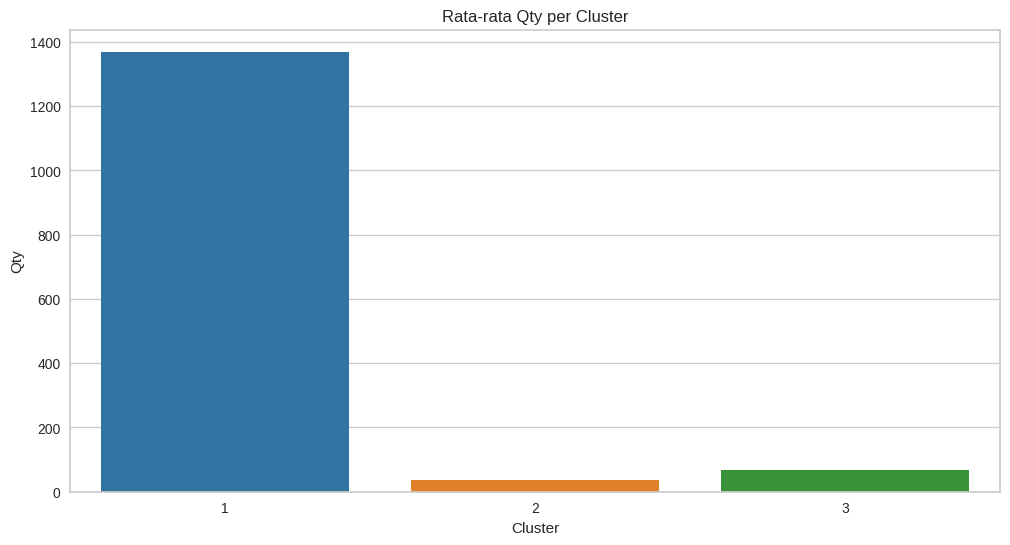

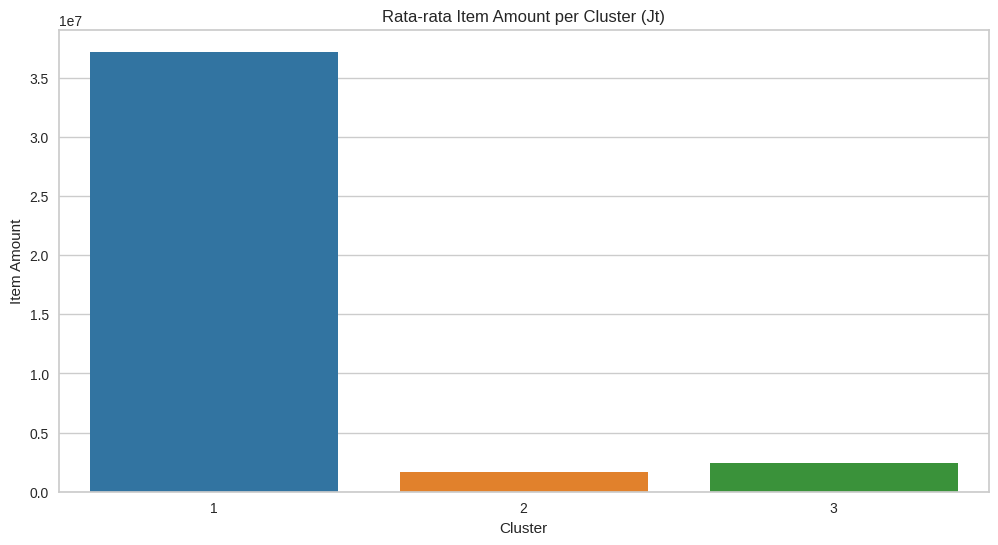

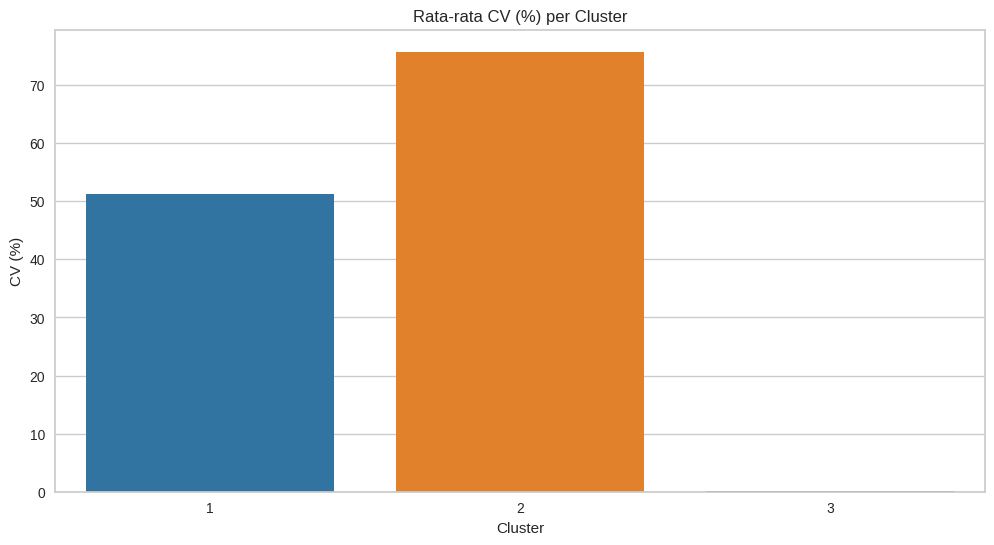

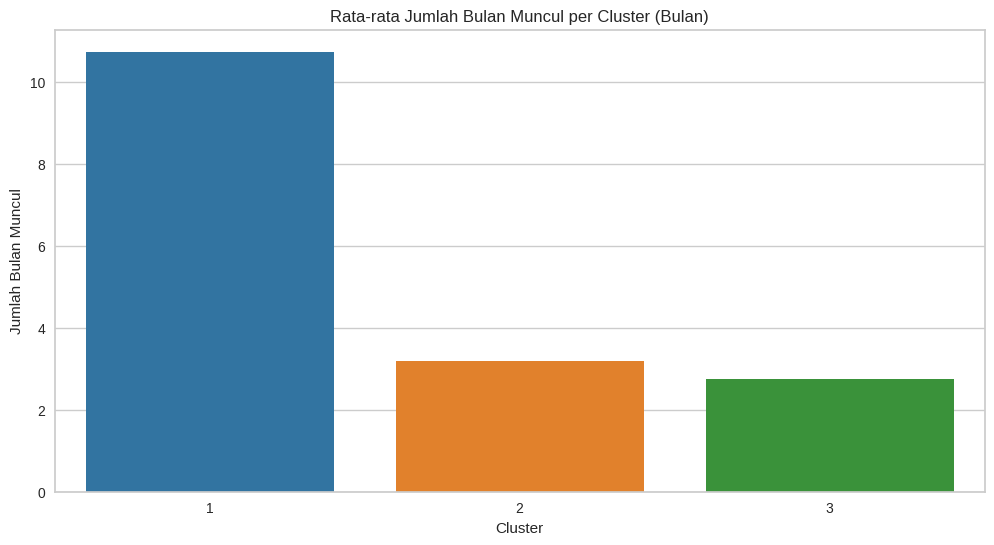

In [85]:
# Asumsikan data_grouped sudah ada
mean_data = data_grouped.groupby('Cluster').agg({
    'Qty': 'mean',
    'Item Amount': 'mean',
    'CV (%)': 'mean',
    'Jumlah Bulan Muncul': 'mean'
}).reset_index()

# Ubah Cluster ke string supaya matching dengan palette keys
mean_data['Cluster'] = mean_data['Cluster'].astype(str)

# Palette dengan key string
custom_palette = {
    '1': '#1f77b4', #blue
    '2': '#ff7f0e', #orange
    '3': '#2ca02c' #green
}

# Plot Qty per Cluster dengan hue dan legend=False
plt.figure(figsize=(12, 6))
sns.barplot(x='Cluster', y='Qty', data=mean_data, hue='Cluster', palette=custom_palette, dodge=False, legend=False)
plt.title('Rata-rata Qty per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Qty')
plt.show()

# Plot Item Amount per Cluster
plt.figure(figsize=(12, 6))
sns.barplot(x='Cluster', y='Item Amount', data=mean_data, hue='Cluster', palette=custom_palette, dodge=False, legend=False)
plt.title('Rata-rata Item Amount per Cluster (Jt)')
plt.xlabel('Cluster')
plt.ylabel('Item Amount')
plt.show()

# Plot CV (%) per Cluster
plt.figure(figsize=(12, 6))
sns.barplot(x='Cluster', y='CV (%)', data=mean_data, hue='Cluster', palette=custom_palette, dodge=False, legend=False)
plt.title('Rata-rata CV (%) per Cluster')
plt.xlabel('Cluster')
plt.ylabel('CV (%)')
plt.show()

# Plot Jumlah Bulan Muncul per Cluster
plt.figure(figsize=(12, 6))
sns.barplot(x='Cluster', y='Jumlah Bulan Muncul', data=mean_data, hue='Cluster', palette=custom_palette, dodge=False, legend=False)
plt.title('Rata-rata Jumlah Bulan Muncul per Cluster (Bulan)')
plt.xlabel('Cluster')
plt.ylabel('Jumlah Bulan Muncul')
plt.show()


# **Data Visualisasi**

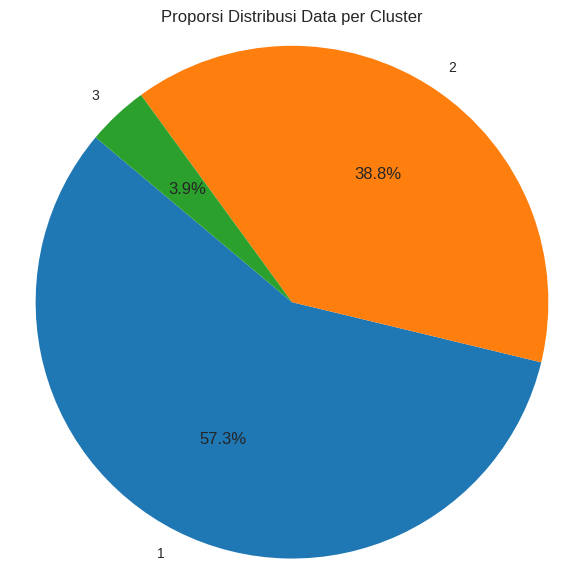

In [86]:
# Hitung jumlah data per cluster
cluster_counts = data_grouped['Cluster'].value_counts().sort_index()

# Pastikan cluster_counts index bertipe string (agar cocok dengan palette key)
cluster_counts.index = cluster_counts.index.astype(str)

# Definisikan custom palette
custom_palette = {
    '1': '#1f77b4',  # Biru
    '2': '#ff7f0e',  # Oranye
    '3': '#2ca02c'   # Hijau
}

# Ambil warna sesuai urutan label
pie_colors = [custom_palette[cl] for cl in cluster_counts.index]

# Pie chart
plt.figure(figsize=(6, 6))
plt.pie(cluster_counts, labels=cluster_counts.index, autopct='%1.1f%%',
        startangle=140, colors=pie_colors)
plt.title('Proporsi Distribusi Data per Cluster')
plt.axis('equal')  # Lingkaran sempurna
plt.tight_layout()
plt.show()

/tmp/ipython-input-87-1982555888.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top10_use, x='Use', y='Qty', palette='viridis')


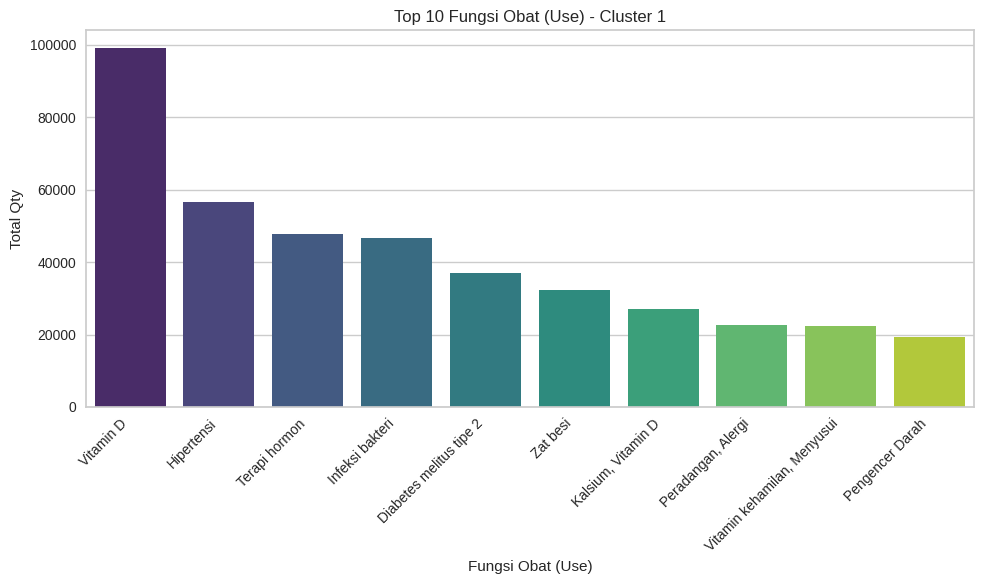

/tmp/ipython-input-87-1982555888.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top10_use, x='Use', y='Qty', palette='viridis')


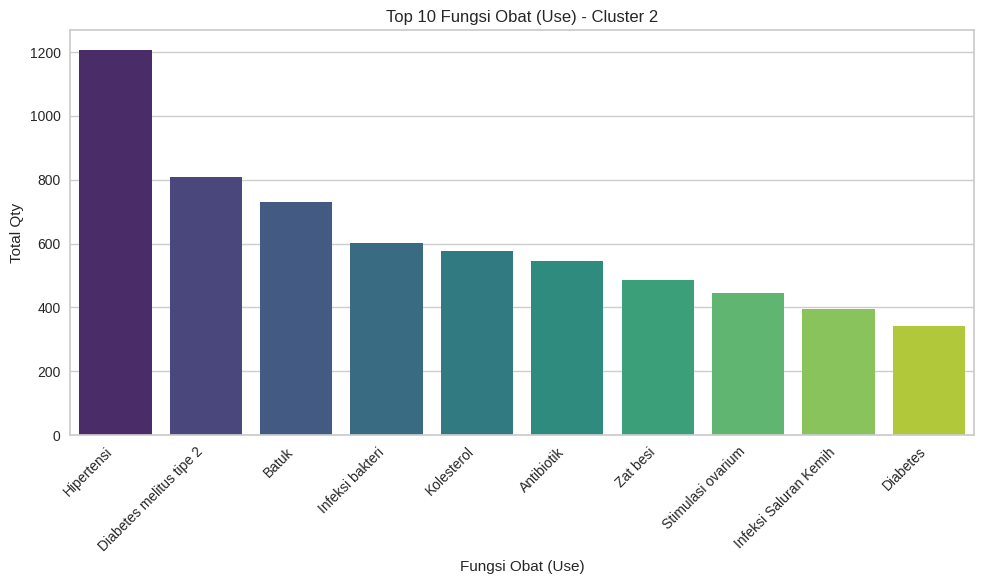

/tmp/ipython-input-87-1982555888.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top10_use, x='Use', y='Qty', palette='viridis')


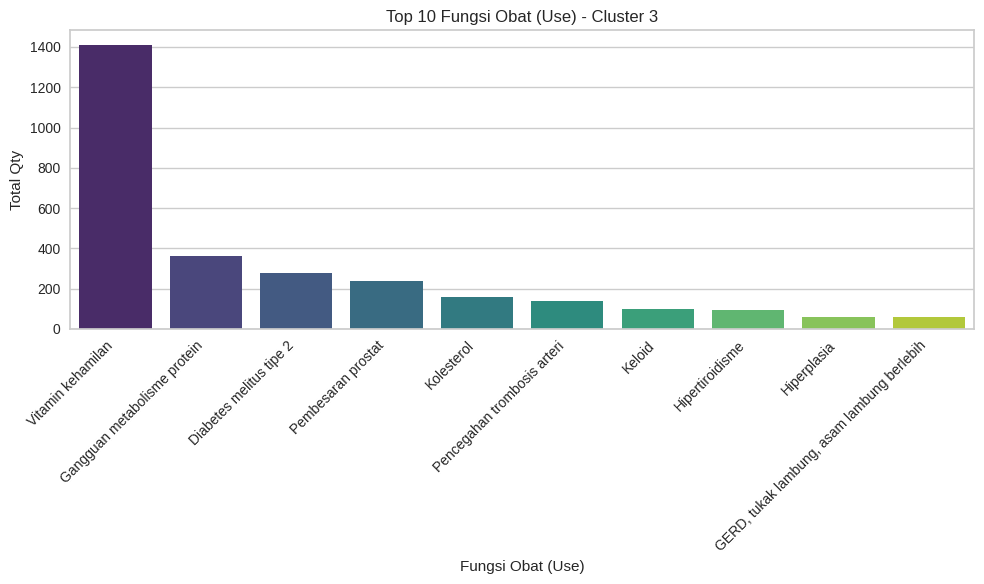

In [87]:
# Ambil daftar semua cluster
clusters = sorted(data_grouped['Cluster'].unique())

# Loop setiap cluster
for cluster in clusters:
    # Filter data per cluster
    data_cluster = data_grouped[data_grouped['Cluster'] == cluster]

    # Hitung total Qty per Use
    use_qty = (
        data_cluster
        .groupby('Use')['Qty']
        .sum()
        .reset_index()
        .sort_values('Qty', ascending=False)
    )

    # Ambil Top 10
    top10_use = use_qty.head(10)

    # Plot bar chart vertikal dengan label miring
    plt.figure(figsize=(10, 6))
    sns.barplot(data=top10_use, x='Use', y='Qty', palette='viridis')
    plt.title(f'Top 10 Fungsi Obat (Use) - Cluster {cluster}')
    plt.xlabel('Fungsi Obat (Use)')
    plt.ylabel('Total Qty')
    plt.xticks(rotation=45, ha='right')  # Miringkan label sumbu X
    plt.tight_layout()
    plt.show()

In [88]:
# Gabungkan hasil clustering ke data asli (yang punya Month)
data_final = pd.merge(data_selected, data_grouped[['Item', 'Cluster']], on='Item', how='left')

data_final

,Invoice Date,Item,Qty,Item Amount,Supplier,Use,Month,CV (%),Jumlah Bulan Muncul,Cluster
0,2024-01-01 00:16:45,NEUROBION INJ 5000 (20 AMPUL/BOX),1.0,18530.7840,P&G ( PROCTER & GAMBLE ),Neuropati,1,13.518807,12,1
1,2024-01-01 04:06:33,LANSOPRAZOL CAPSUL 30 MG,10.0,20999.9790,OGB,"GERD, tukak lambung, ulkus duodenum",1,26.873509,12,1
2,2024-01-01 06:59:37,SUMAGESIC TAB,12.0,10683.0660,UAP,"Nyeri, Demam",1,29.604279,12,1
3,2024-01-01 06:59:37,ZEGAVIT ( 60 TAB/BOX ),10.0,68376.0000,KALBE FARMA,Suplementasi vitamin,1,44.072152,12,1
4,2024-01-01 06:59:37,NEUROBION INJ 5000 (20 AMPUL/BOX),1.0,23781.1728,P&G ( PROCTER & GAMBLE ),Neuropati,1,13.518807,12,1
...,...,...,...,...,...,...,...,...,...,...
115580,2024-12-31 19:26:29,METFORMIN 500 MG,60.0,28205.1000,OGB,Diabetes melitus tipe 2,12,29.711225,12,1
115581,2024-12-31 19:26:29,NEUROBION FORTE 5000MG TAB (250 TAB/BOX),20.0,126939.3600,P&G ( PROCTER & GAMBLE ),Neuropati,12,52.058390,12,1
115582,2024-12-31 21:07:15,ILIADIN SPRAY DWS 0.05%,1.0,93602.3040,P&G ( PROCTER & GAMBLE ),Hidung tersumbat,12,69.719029,12,1
115583,2024-12-31 23:03:20,OXYTETRACYCLIN SALEP MATA 1%,1.0,70310.2544,OGB,Infeksi bakteri pada mata,12,27.499163,12,1


In [89]:
data_grouped_clustered = data_final.groupby(
    ['Item', 'Supplier', 'Use', 'Month', 'CV (%)', 'Cluster'],
    as_index=False
)[['Qty', 'Item Amount']].sum()

data_grouped_clustered

,Item,Supplier,Use,Month,CV (%),Cluster,Qty,Item Amount
0,AAV SALEP,DIPA PHARMALAB,Anti jamur,4,0.000000,3,1.0,9.333324e+03
1,AAV SALEP,DIPA PHARMALAB,Anti jamur,7,0.000000,3,1.0,9.170931e+02
2,AAV SALEP,DIPA PHARMALAB,Anti jamur,8,0.000000,3,1.0,8.744950e+02
3,ABBOTIC SYR 125MG/5ML 60ML,ABBOTT,"Infeksi Saluran Pernapasan, Infeksi kulit",3,34.992711,2,1.0,2.374956e+05
4,ABBOTIC SYR 125MG/5ML 60ML,ABBOTT,"Infeksi Saluran Pernapasan, Infeksi kulit",4,34.992711,2,1.0,3.047860e+05
...,...,...,...,...,...,...,...,...
9588,ZITROLIN ( 6 TAB/BOX ),OTTO,Infeksi bakteri,12,106.111264,1,42.0,2.852736e+06
9589,ZOLMIA TAB,FAHRENHEIT,Migrain,5,80.000000,2,3.0,6.357000e+04
9590,ZOLTA 10 MG,NOVELL,Disfungsi ereksi,8,80.000000,2,20.0,3.145296e+05
9591,ZOTER CREAM 5 GR,INTERBAT,Anti jamur,4,80.000000,2,2.0,2.355553e+05


In [90]:
# Menampilkan statistik deskriptif per cluster
for cluster_num in range(1, 4):
    print(f"Statistik deskriptif untuk Cluster {cluster_num}:")
    # Filter data per cluster
    cluster_data = data_grouped[data_grouped['Cluster'] == cluster_num]

    relevant_columns = ['Qty', 'Item Amount', 'CV (%)', 'Jumlah Bulan Muncul']
    print(cluster_data[relevant_columns].describe())
    print("\n" + "="*50 + "\n")

Statistik deskriptif untuk Cluster 1:
                Qty   Item Amount      CV (%)  Jumlah Bulan Muncul
count    742.000000  7.420000e+02  742.000000           742.000000
mean    1369.741078  3.720687e+07   51.287785            10.731806
std     3257.833792  9.858486e+07   22.590662             2.110199
min        7.000000  1.063671e+05   12.510790             3.000000
25%      131.000000  3.638295e+06   35.610763            10.000000
50%      377.000000  1.003691e+07   48.459747            12.000000
75%     1307.750000  3.166443e+07   62.390105            12.000000
max    53325.000000  1.565084e+09  269.779692            12.000000


Statistik deskriptif untuk Cluster 2:
              Qty   Item Amount      CV (%)  Jumlah Bulan Muncul
count  502.000000  5.020000e+02  502.000000           502.000000
mean    35.766932  1.691135e+06   75.724780             3.185259
std     57.800715  4.971241e+06   40.682833             2.550790
min      1.000000  0.000000e+00    9.428090             1.0

In [91]:
# Salin data
data_exploded = data_grouped_clustered.copy()

# Pecah isi kolom 'Use' menjadi list
data_exploded['Use'] = data_exploded['Use'].str.split(',')

# Explode agar setiap penyakit berada di baris sendiri
data_exploded = data_exploded.explode('Use')

# Hapus spasi berlebih
data_exploded['Use'] = data_exploded['Use'].str.strip()

# === Tambahan: manipulasi cluster untuk item PERGOVERIS ===

# 1. Hapus baris di mana Item = PERGOVERIS dan Cluster = 2
data_exploded = data_exploded[
    ~((data_exploded['Item'] == 'PERGOVERIS 150 IU/75 IU') & (data_exploded['Cluster'] == 2))
]

# 2. Ubah Cluster menjadi 2 jika Item = PERGOVERIS dan Cluster = 1
data_exploded.loc[
    (data_exploded['Item'] == 'PERGOVERIS 150 IU/75 IU') & (data_exploded['Cluster'] == 1),
    'Cluster'
] = 2

# Tampilkan hasil akhir
data_exploded

,Item,Supplier,Use,Month,CV (%),Cluster,Qty,Item Amount
0,AAV SALEP,DIPA PHARMALAB,Anti jamur,4,0.000000,3,1.0,9.333324e+03
1,AAV SALEP,DIPA PHARMALAB,Anti jamur,7,0.000000,3,1.0,9.170931e+02
2,AAV SALEP,DIPA PHARMALAB,Anti jamur,8,0.000000,3,1.0,8.744950e+02
3,ABBOTIC SYR 125MG/5ML 60ML,ABBOTT,Infeksi Saluran Pernapasan,3,34.992711,2,1.0,2.374956e+05
3,ABBOTIC SYR 125MG/5ML 60ML,ABBOTT,Infeksi kulit,3,34.992711,2,1.0,2.374956e+05
...,...,...,...,...,...,...,...,...
9588,ZITROLIN ( 6 TAB/BOX ),OTTO,Infeksi bakteri,12,106.111264,1,42.0,2.852736e+06
9589,ZOLMIA TAB,FAHRENHEIT,Migrain,5,80.000000,2,3.0,6.357000e+04
9590,ZOLTA 10 MG,NOVELL,Disfungsi ereksi,8,80.000000,2,20.0,3.145296e+05
9591,ZOTER CREAM 5 GR,INTERBAT,Anti jamur,4,80.000000,2,2.0,2.355553e+05


# **Curah Hujan**

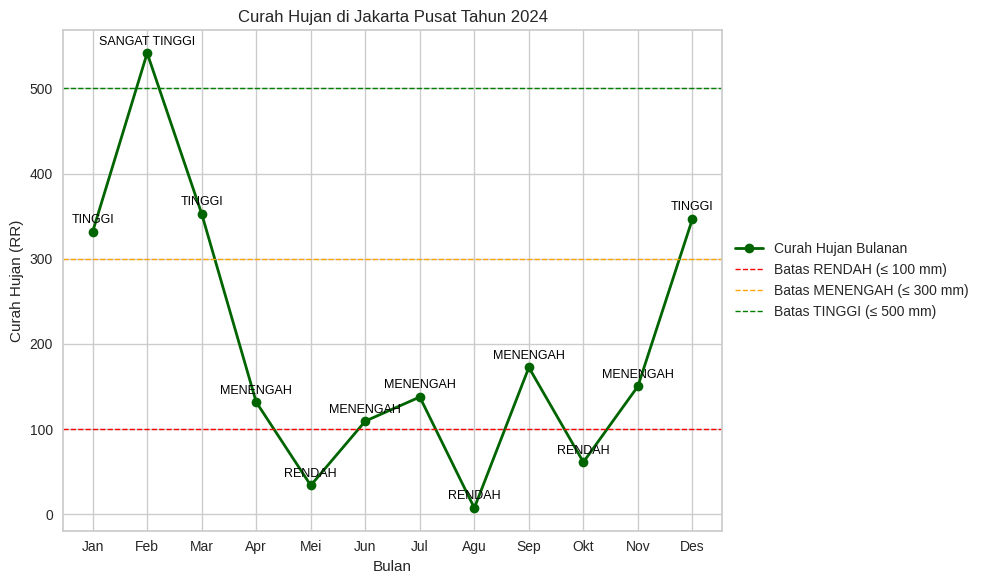

In [92]:
# URL Google Sheets dalam format CSV
url = "https://docs.google.com/spreadsheets/d/1iV-HQsqU36-r3pjR-zUu33a4wM2LTk49nGLN_V6o1oY/export?format=csv"
data_CurahHujan = pd.read_csv(url)

# Pastikan kolom TANGGAL dalam format datetime
data_CurahHujan['TANGGAL'] = pd.to_datetime(data_CurahHujan['TANGGAL'])

# Tambahkan kolom nama bulan
data_CurahHujan['BULAN'] = data_CurahHujan['TANGGAL'].dt.month

# Hitung jumlah curah hujan per bulan
monthly_sum = data_CurahHujan.groupby('BULAN')['RR'].sum().reset_index()

# Daftar nama bulan
nama_bulan = ['Jan', 'Feb', 'Mar', 'Apr', 'Mei', 'Jun', 'Jul', 'Agu', 'Sep', 'Okt', 'Nov', 'Des']
monthly_sum['BULAN'] = monthly_sum['BULAN'].apply(lambda x: nama_bulan[x - 1])

# Fungsi kategori curah hujan
def kategori_curah_hujan(rr):
    if rr <= 100:
        return 'RENDAH'
    elif rr <= 300:
        return 'MENENGAH'
    elif rr <= 500:
        return 'TINGGI'
    else:
        return 'SANGAT TINGGI'

# Tambahkan kolom kategori
monthly_sum['KATEGORI'] = monthly_sum['RR'].apply(kategori_curah_hujan)

# Buat figure dan axis
fig, ax = plt.subplots(figsize=(10, 6))

# Plot garis curah hujan
ax.plot(monthly_sum['BULAN'], monthly_sum['RR'], label='Curah Hujan Bulanan', color='darkgreen', linewidth=2, marker='o')

# Tambahkan label kategori di atas titik
for i, row in monthly_sum.iterrows():
    ax.text(i, row['RR'] + 10, row['KATEGORI'], ha='center', fontsize=9, color='black')

# Tambahkan garis batas kategori
ax.axhline(y=100, color='red', linestyle='--', linewidth=1, label='Batas RENDAH (≤ 100 mm)')
ax.axhline(y=300, color='orange', linestyle='--', linewidth=1, label='Batas MENENGAH (≤ 300 mm)')
ax.axhline(y=500, color='green', linestyle='--', linewidth=1, label='Batas TINGGI (≤ 500 mm)')

# Pengaturan chart
ax.set_title('Curah Hujan di Jakarta Pusat Tahun 2024')
ax.set_xlabel('Bulan')
ax.set_ylabel('Curah Hujan (RR)')
ax.grid(True)

# Letakkan legend di luar grafik (kanan)
ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))  # Kanan tengah

# Atur agar layout tidak terpotong
plt.tight_layout()
plt.show()

In [93]:
# Hitung total curah hujan per bulan (Month sebagai angka)
monthly_sum = data_CurahHujan.groupby(data_CurahHujan['TANGGAL'].dt.month)['RR'].sum().reset_index()
monthly_sum.columns = ['Month', 'RR_BULAN']

# Pastikan tipe data sama
data_exploded['Month'] = data_exploded['Month'].astype(int)
monthly_sum['Month'] = monthly_sum['Month'].astype(int)

# Merge data
data_exploded = data_exploded.merge(monthly_sum, on='Month', how='left')

In [94]:
data_exploded

,Item,Supplier,Use,Month,CV (%),Cluster,Qty,Item Amount,RR_BULAN
0,AAV SALEP,DIPA PHARMALAB,Anti jamur,4,0.000000,3,1.0,9.333324e+03,131.80
1,AAV SALEP,DIPA PHARMALAB,Anti jamur,7,0.000000,3,1.0,9.170931e+02,137.80
2,AAV SALEP,DIPA PHARMALAB,Anti jamur,8,0.000000,3,1.0,8.744950e+02,7.60
3,ABBOTIC SYR 125MG/5ML 60ML,ABBOTT,Infeksi Saluran Pernapasan,3,34.992711,2,1.0,2.374956e+05,352.75
4,ABBOTIC SYR 125MG/5ML 60ML,ABBOTT,Infeksi kulit,3,34.992711,2,1.0,2.374956e+05,352.75
...,...,...,...,...,...,...,...,...,...
12263,ZITROLIN ( 6 TAB/BOX ),OTTO,Infeksi bakteri,12,106.111264,1,42.0,2.852736e+06,346.70
12264,ZOLMIA TAB,FAHRENHEIT,Migrain,5,80.000000,2,3.0,6.357000e+04,34.10
12265,ZOLTA 10 MG,NOVELL,Disfungsi ereksi,8,80.000000,2,20.0,3.145296e+05,7.60
12266,ZOTER CREAM 5 GR,INTERBAT,Anti jamur,4,80.000000,2,2.0,2.355553e+05,131.80


## **Analisis Curah Hujan Cluster 1**

/tmp/ipython-input-95-2084904029.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_use_hujan_sangattinggi_cl1, x='Use', y='Qty', palette='viridis')


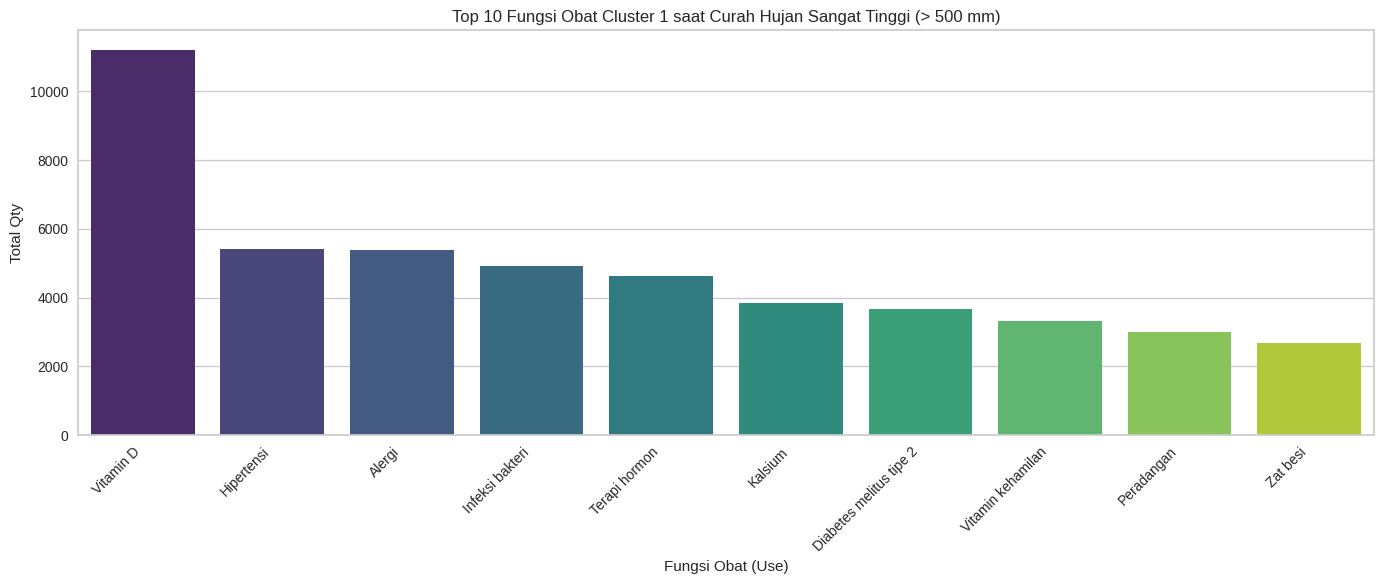

                         Use      Qty
262                Vitamin D  11211.0
91                Hipertensi   5426.0
1                     Alergi   5389.0
105          Infeksi bakteri   4908.0
247            Terapi hormon   4641.0
124                  Kalsium   3851.0
42   Diabetes melitus tipe 2   3668.0
264        Vitamin kehamilan   3324.0
209               Peradangan   2996.0
266                 Zat besi   2690.0


In [95]:
# Filter data untuk curah hujan > 500 mm dan cluster 1
data_hujan_sangattinggi_cl1 = data_exploded[
    (data_exploded['RR_BULAN'] > 500) &
    (data_exploded['Cluster'] == 1)
]

# Hitung total Qty per fungsi obat
use_qty_cl1 = (
    data_hujan_sangattinggi_cl1
    .groupby('Use')['Qty']
    .sum()
    .reset_index()
    .sort_values('Qty', ascending=False)
)

# Tampilkan top 10
top_use_hujan_sangattinggi_cl1 = use_qty_cl1.head(10)

# Plot
plt.figure(figsize=(14, 6))
sns.barplot(data=top_use_hujan_sangattinggi_cl1, x='Use', y='Qty', palette='viridis')
plt.title('Top 10 Fungsi Obat Cluster 1 saat Curah Hujan Sangat Tinggi (> 500 mm)')
plt.xlabel('Fungsi Obat (Use)')
plt.ylabel('Total Qty')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Cetak tabel hasil
print(top_use_hujan_sangattinggi_cl1)

In [96]:
# Inisialisasi list untuk menyimpan hasil
top3_item_supplier_per_use = []

# Loop setiap Use dari top 10
for use in top_use_hujan_sangattinggi_cl1['Use']:
    # Filter data sesuai use
    data_per_use = data_hujan_sangattinggi_cl1[data_hujan_sangattinggi_cl1['Use'] == use]

    # Group by Item dan Supplier, hitung total Qty
    item_supplier_qty = (
        data_per_use
        .groupby(['Item', 'Supplier'])
        ['Qty']
        .sum()
        .reset_index()
        .sort_values('Qty', ascending=False)
        .head(3)  # Ambil top 3
    )

    # Tambahkan kolom Use untuk identifikasi
    item_supplier_qty['Use'] = use

    # Tambahkan ke list
    top3_item_supplier_per_use.append(item_supplier_qty)

# Gabungkan semua hasil menjadi satu DataFrame
top3_item_supplier_df = pd.concat(top3_item_supplier_per_use, ignore_index=True)

# Tampilkan hasil
top3_item_supplier_df

,Item,Supplier,Qty,Use
0,FORCE D 5000 IU,DEXA MEDICA,6901.0,Vitamin D
1,FORMICAL-B,DEXA MEDICA,2330.0,Vitamin D
2,L-VIT D3 5000 IU,LAPI,1174.0,Vitamin D
3,LASAL 2 MG,LAPI,1238.0,Hipertensi
4,DOPAMET 250MG,ACTAVIS,434.0,Hipertensi
5,CANDESARTAN 8 MG,OGB,387.0,Hipertensi
6,RHINOS SR,DEXA MEDICA,1236.0,Alergi
7,LAMESON TAB 4 MG,LAPI,1217.0,Alergi
8,RHINOFED TAB,DEXA MEDICA,823.0,Alergi
9,TRILAC TABLET ( 30 TAB/BOX ),NOVELL,1412.0,Infeksi bakteri


/tmp/ipython-input-97-1334939053.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_use_hujan_tinggi_cl1, x='Use', y='Qty', palette='viridis')


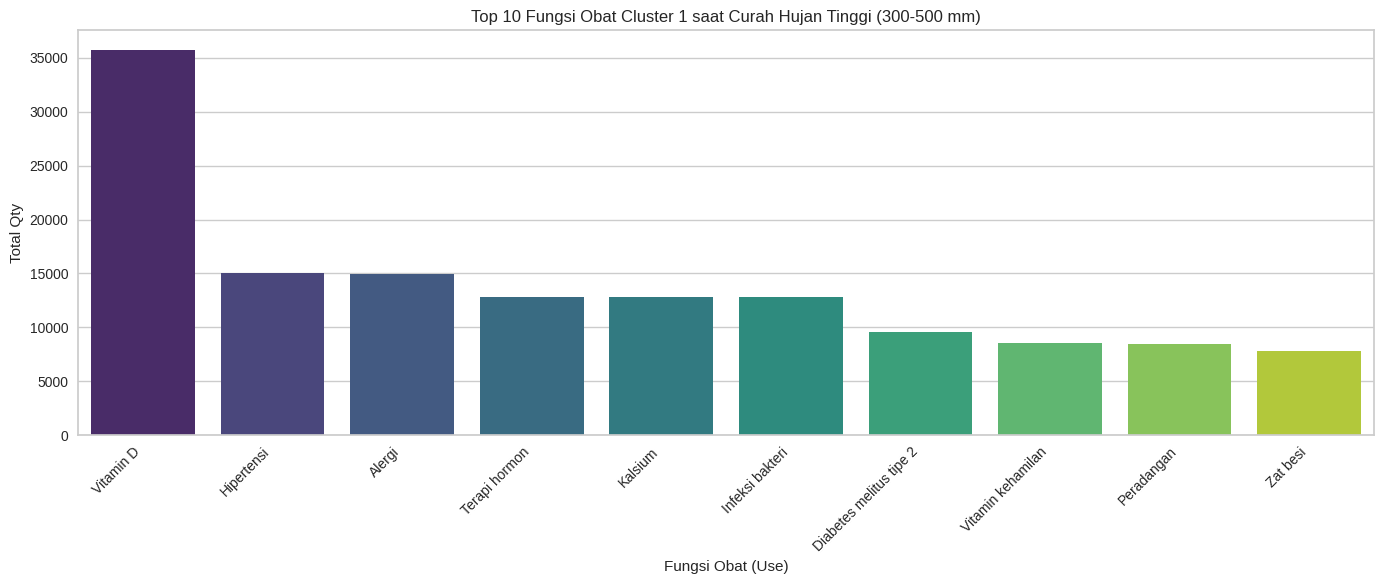

                         Use      Qty
279                Vitamin D  35776.0
100               Hipertensi  15030.0
1                     Alergi  14973.0
264            Terapi hormon  12863.0
133                  Kalsium  12778.0
114          Infeksi bakteri  12777.0
47   Diabetes melitus tipe 2   9561.0
281        Vitamin kehamilan   8569.0
223               Peradangan   8465.0
283                 Zat besi   7777.0


In [97]:
# Filter data untuk curah hujan 300-500 mm dan cluster 1
data_hujan_tinggi_cl1 = data_exploded[
    (data_exploded['RR_BULAN'] >= 300) & (data_exploded['RR_BULAN'] <= 500) &
    (data_exploded['Cluster'] == 1)
]

# Hitung total Qty per fungsi obat
use_qty_cl1 = (
    data_hujan_tinggi_cl1
    .groupby('Use')['Qty']
    .sum()
    .reset_index()
    .sort_values('Qty', ascending=False)
)

# Tampilkan top 10
top_use_hujan_tinggi_cl1 = use_qty_cl1.head(10)

# Plot
plt.figure(figsize=(14, 6))
sns.barplot(data=top_use_hujan_tinggi_cl1, x='Use', y='Qty', palette='viridis')
plt.title('Top 10 Fungsi Obat Cluster 1 saat Curah Hujan Tinggi (300-500 mm)')
plt.xlabel('Fungsi Obat (Use)')
plt.ylabel('Total Qty')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Cetak tabel hasil
print(top_use_hujan_tinggi_cl1)

In [98]:
# Inisialisasi list untuk menyimpan hasil
top3_item_supplier_per_use = []

# Loop setiap Use dari top 10
for use in top_use_hujan_tinggi_cl1['Use']:
    # Filter data sesuai use
    data_per_use = data_hujan_tinggi_cl1[data_hujan_tinggi_cl1['Use'] == use]

    # Group by Item dan Supplier, hitung total Qty
    item_supplier_qty = (
        data_per_use
        .groupby(['Item', 'Supplier'])
        ['Qty']
        .sum()
        .reset_index()
        .sort_values('Qty', ascending=False)
        .head(3)  # Ambil top 3
    )

    # Tambahkan kolom Use untuk identifikasi
    item_supplier_qty['Use'] = use

    # Tambahkan ke list
    top3_item_supplier_per_use.append(item_supplier_qty)

# Gabungkan semua hasil menjadi satu DataFrame
top3_item_supplier_df = pd.concat(top3_item_supplier_per_use, ignore_index=True)

# Tampilkan hasil
top3_item_supplier_df

,Item,Supplier,Qty,Use
0,FORCE D 5000 IU,DEXA MEDICA,14178.0,Vitamin D
1,FORMICAL-B,DEXA MEDICA,7388.0,Vitamin D
2,FORCE D 5000 IU ( 50 CAP/DUS ),DEXA MEDICA,4585.0,Vitamin D
3,LASAL 2 MG,LAPI,2842.0,Hipertensi
4,DOPAMET 250MG,ACTAVIS,1054.0,Hipertensi
5,EXFORGE 5/160 MG TAB,NOVARTIS,820.0,Hipertensi
6,LAMESON TAB 4 MG,LAPI,3152.0,Alergi
7,RHINOS SR,DEXA MEDICA,2877.0,Alergi
8,RHINOFED TAB,DEXA MEDICA,1761.0,Alergi
9,MICROGEST 200 MG,LAPI,5262.0,Terapi hormon


/tmp/ipython-input-99-4056144861.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_use_hujan_menengah_cl1, x='Use', y='Qty', palette='viridis')


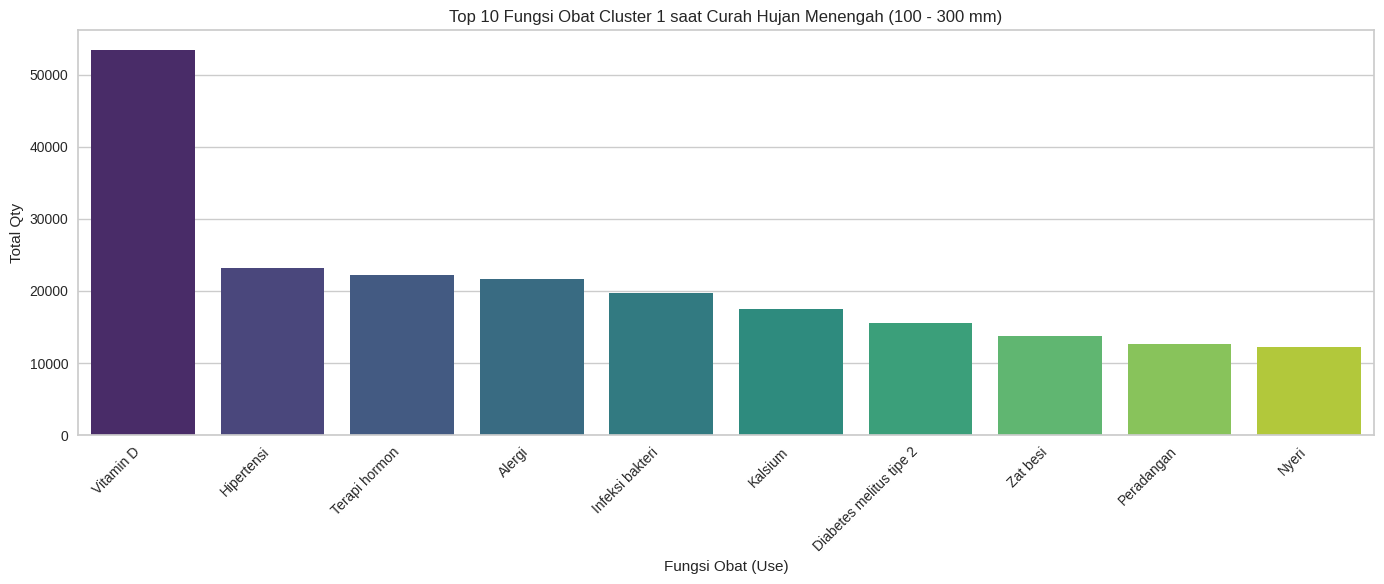

                         Use      Qty
280                Vitamin D  53486.0
101               Hipertensi  23175.0
265            Terapi hormon  22214.0
1                     Alergi  21596.0
115          Infeksi bakteri  19725.0
134                  Kalsium  17444.0
47   Diabetes melitus tipe 2  15569.0
284                 Zat besi  13698.0
224               Peradangan  12671.0
176                    Nyeri  12287.0


In [99]:
# Filter data untuk curah hujan 100 - 300 mm dan cluster 1
data_hujan_menengah_cl1 = data_exploded[
   (data_exploded['RR_BULAN'] >= 100) & (data_exploded['RR_BULAN'] <= 300) &
    (data_exploded['Cluster'] == 1)
]

# Hitung total Qty per fungsi obat
use_qty_cl1 = (
    data_hujan_menengah_cl1
    .groupby('Use')['Qty']
    .sum()
    .reset_index()
    .sort_values('Qty', ascending=False)
)

# Tampilkan top 10
top_use_hujan_menengah_cl1 = use_qty_cl1.head(10)

# Plot
plt.figure(figsize=(14, 6))
sns.barplot(data=top_use_hujan_menengah_cl1, x='Use', y='Qty', palette='viridis')
plt.title('Top 10 Fungsi Obat Cluster 1 saat Curah Hujan Menengah (100 - 300 mm)')
plt.xlabel('Fungsi Obat (Use)')
plt.ylabel('Total Qty')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Cetak tabel hasil
print(top_use_hujan_menengah_cl1)

In [100]:
# Inisialisasi list untuk menyimpan hasil
top3_item_supplier_per_use = []

# Loop setiap Use dari top 10
for use in top_use_hujan_menengah_cl1['Use']:
    # Filter data sesuai use
    data_per_use = data_hujan_menengah_cl1[data_hujan_menengah_cl1['Use'] == use]

    # Group by Item dan Supplier, hitung total Qty
    item_supplier_qty = (
        data_per_use
        .groupby(['Item', 'Supplier'])
        ['Qty']
        .sum()
        .reset_index()
        .sort_values('Qty', ascending=False)
        .head(3)  # Ambil top 3
    )

    # Tambahkan kolom Use untuk identifikasi
    item_supplier_qty['Use'] = use

    # Tambahkan ke list
    top3_item_supplier_per_use.append(item_supplier_qty)

# Gabungkan semua hasil menjadi satu DataFrame
top3_item_supplier_df = pd.concat(top3_item_supplier_per_use, ignore_index=True)

# Tampilkan hasil
top3_item_supplier_df

,Item,Supplier,Qty,Use
0,FORCE D 5000 IU,DEXA MEDICA,17582.0,Vitamin D
1,FORCE D 5000 IU ( 50 CAP/DUS ),DEXA MEDICA,11671.0,Vitamin D
2,FORMICAL-B,DEXA MEDICA,10317.0,Vitamin D
3,LASAL 2 MG,LAPI,3865.0,Hipertensi
4,LASGAN CAPSUL 30 MG,LAPI,1517.0,Hipertensi
5,DOPAMET 250MG,ACTAVIS,1480.0,Hipertensi
6,DUPHASTON 10 MG,ABBOTT,8845.0,Terapi hormon
7,MICROGEST 200 MG,LAPI,8089.0,Terapi hormon
8,CYGEST 400 MG,PT. MURNI AIK SUKSES,2115.0,Terapi hormon
9,RHINOS SR,DEXA MEDICA,4734.0,Alergi


/tmp/ipython-input-101-3574863977.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_use_hujan_rendah_cl1, x='Use', y='Qty', palette='viridis')


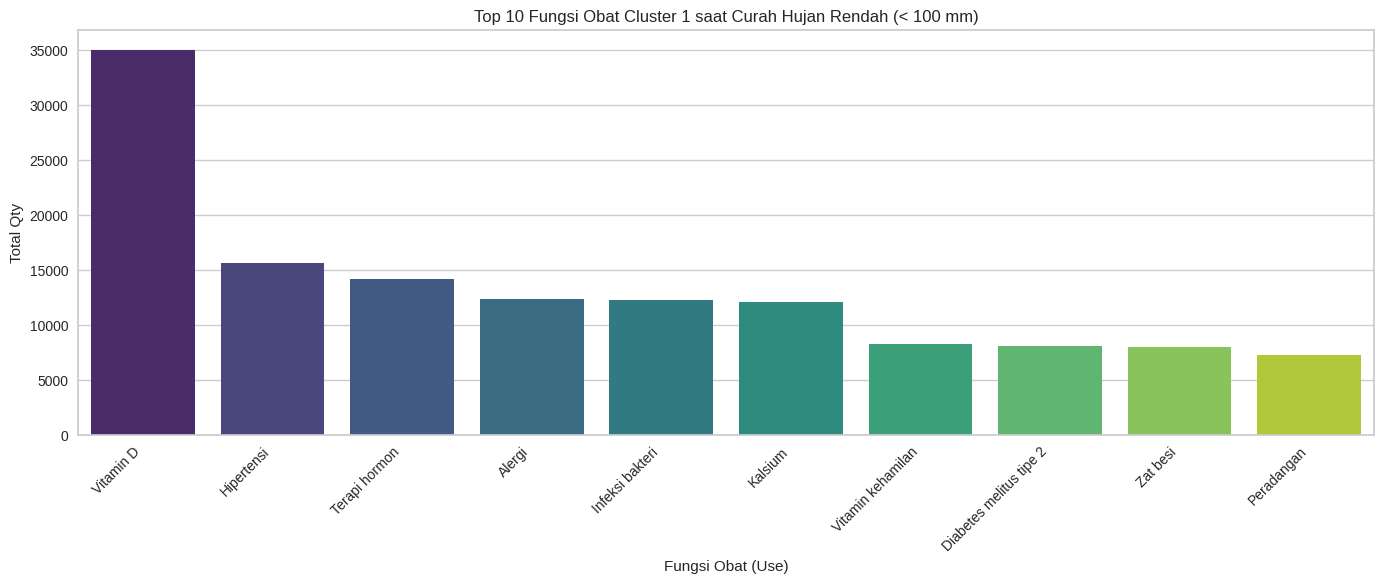

                         Use      Qty
279                Vitamin D  35058.0
101               Hipertensi  15674.0
264            Terapi hormon  14184.0
1                     Alergi  12416.0
115          Infeksi bakteri  12307.0
133                  Kalsium  12142.0
281        Vitamin kehamilan   8280.0
47   Diabetes melitus tipe 2   8127.0
283                 Zat besi   8035.0
223               Peradangan   7258.0


In [101]:
# Filter data untuk curah hujan < 100 mm dan cluster 1
data_hujan_rendah_cl1 = data_exploded[
    (data_exploded['RR_BULAN'] < 100) &
    (data_exploded['Cluster'] == 1)
]

# Hitung total Qty per fungsi obat
use_qty_cl1 = (
    data_hujan_rendah_cl1
    .groupby('Use')['Qty']
    .sum()
    .reset_index()
    .sort_values('Qty', ascending=False)
)

# Tampilkan top 10
top_use_hujan_rendah_cl1 = use_qty_cl1.head(10)

# Plot
plt.figure(figsize=(14, 6))
sns.barplot(data=top_use_hujan_rendah_cl1, x='Use', y='Qty', palette='viridis')
plt.title('Top 10 Fungsi Obat Cluster 1 saat Curah Hujan Rendah (< 100 mm)')
plt.xlabel('Fungsi Obat (Use)')
plt.ylabel('Total Qty')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Cetak tabel hasil
print(top_use_hujan_rendah_cl1)

In [102]:
# Inisialisasi list untuk menyimpan hasil
top3_item_supplier_per_use = []

# Loop setiap Use dari top 10
for use in top_use_hujan_rendah_cl1['Use']:
    # Filter data sesuai use
    data_per_use = data_hujan_rendah_cl1[data_hujan_rendah_cl1['Use'] == use]

    # Group by Item dan Supplier, hitung total Qty
    item_supplier_qty = (
        data_per_use
        .groupby(['Item', 'Supplier'])
        ['Qty']
        .sum()
        .reset_index()
        .sort_values('Qty', ascending=False)
        .head(3)  # Ambil top 3
    )

    # Tambahkan kolom Use untuk identifikasi
    item_supplier_qty['Use'] = use

    # Tambahkan ke list
    top3_item_supplier_per_use.append(item_supplier_qty)

# Gabungkan semua hasil menjadi satu DataFrame
top3_item_supplier_df = pd.concat(top3_item_supplier_per_use, ignore_index=True)

# Tampilkan hasil
top3_item_supplier_df

,Item,Supplier,Qty,Use
0,FORCE D 5000 IU,DEXA MEDICA,14664.0,Vitamin D
1,FORMICAL-B,DEXA MEDICA,6915.0,Vitamin D
2,FORCE D 5000 IU ( 50 CAP/DUS ),DEXA MEDICA,4874.0,Vitamin D
3,LASAL 2 MG,LAPI,2258.0,Hipertensi
4,DOPAMET 250MG,ACTAVIS,1225.0,Hipertensi
5,LASGAN CAPSUL 30 MG,LAPI,1044.0,Hipertensi
6,MICROGEST 200 MG,LAPI,5582.0,Terapi hormon
7,DUPHASTON 10 MG,ABBOTT,5125.0,Terapi hormon
8,CYGEST 400 MG,PT. MURNI AIK SUKSES,1498.0,Terapi hormon
9,LAMESON TAB 4 MG,LAPI,2652.0,Alergi


## **Analisis Curah Hujan Cluster 2**

/tmp/ipython-input-103-1117790327.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_use_hujan_sangattinggi_cl2, x='Use', y='Qty', palette='viridis')


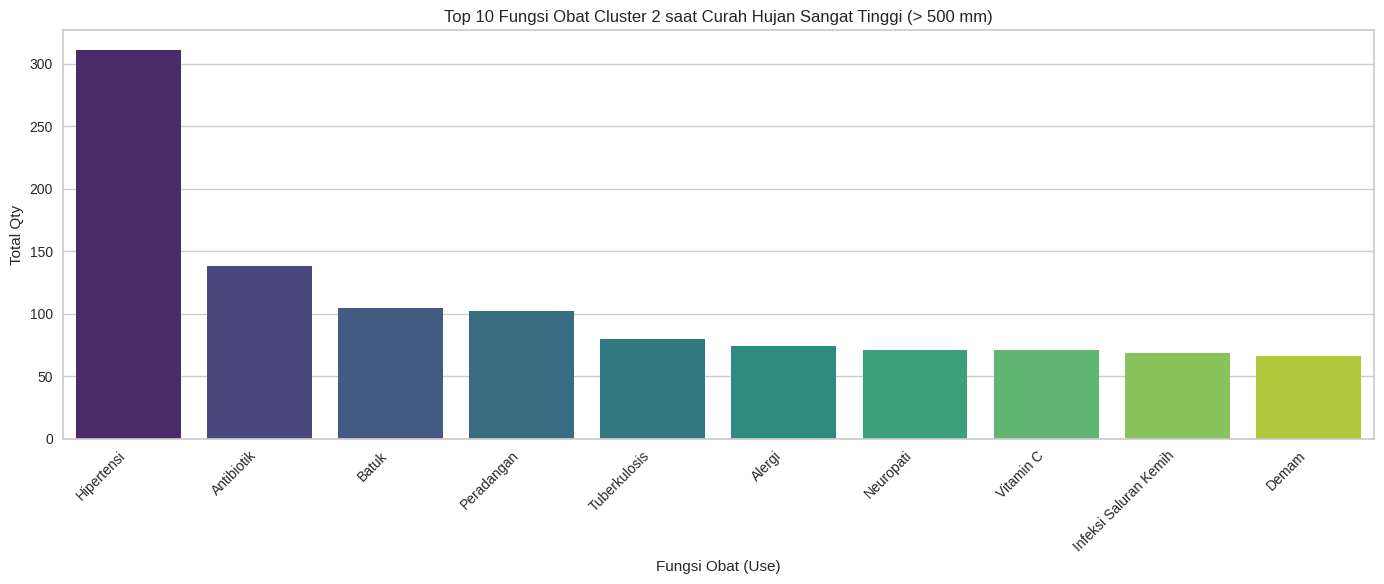

                      Use    Qty
35             Hipertensi  311.0
6              Antibiotik  138.0
11                  Batuk  105.0
79             Peradangan  102.0
92           Tuberkulosis   80.0
0                  Alergi   74.0
64              Neuropati   71.0
97              Vitamin C   71.0
37  Infeksi Saluran Kemih   69.0
12                  Demam   66.0


In [103]:
# Filter data untuk curah hujan > 500 mm dan cluster 2
data_hujan_sangattinggi_cl2 = data_exploded[
    (data_exploded['RR_BULAN'] > 500) &
    (data_exploded['Cluster'] == 2)
]

# Hitung total Qty per fungsi obat
use_qty_cl2 = (
    data_hujan_sangattinggi_cl2
    .groupby('Use')['Qty']
    .sum()
    .reset_index()
    .sort_values('Qty', ascending=False)
)

# Tampilkan top 10
top_use_hujan_sangattinggi_cl2 = use_qty_cl2.head(10)

# Plot
plt.figure(figsize=(14, 6))
sns.barplot(data=top_use_hujan_sangattinggi_cl2, x='Use', y='Qty', palette='viridis')
plt.title('Top 10 Fungsi Obat Cluster 2 saat Curah Hujan Sangat Tinggi (> 500 mm)')
plt.xlabel('Fungsi Obat (Use)')
plt.ylabel('Total Qty')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Cetak tabel hasil
print(top_use_hujan_sangattinggi_cl2)

In [104]:
# Inisialisasi list untuk menyimpan hasil
top3_item_supplier_per_use = []

# Loop setiap Use dari top 10
for use in top_use_hujan_sangattinggi_cl2['Use']:
    # Filter data sesuai use
    data_per_use = data_hujan_sangattinggi_cl2[data_hujan_sangattinggi_cl2['Use'] == use]

    # Group by Item dan Supplier, hitung total Qty
    item_supplier_qty = (
        data_per_use
        .groupby(['Item', 'Supplier'])
        ['Qty']
        .sum()
        .reset_index()
        .sort_values('Qty', ascending=False)
        .head(3)  # Ambil top 3
    )

    # Tambahkan kolom Use untuk identifikasi
    item_supplier_qty['Use'] = use

    # Tambahkan ke list
    top3_item_supplier_per_use.append(item_supplier_qty)

# Gabungkan semua hasil menjadi satu DataFrame
top3_item_supplier_df = pd.concat(top3_item_supplier_per_use, ignore_index=True)

# Tampilkan hasil
top3_item_supplier_df

,Item,Supplier,Qty,Use
0,HCT 25 MG,OGB,110.0,Hipertensi
1,"RAMIPRIL TAB 2,5MG",OGB,50.0,Hipertensi
2,CARPIATON 25 MG TAB,FAHRENHEIT,40.0,Hipertensi
3,DOXYCICLIN 100 MG,KIMIA FARMA,138.0,Antibiotik
4,CODIKAF 10 MG TABLET,KIMIA FARMA,101.0,Batuk
5,FIXIPHAR 100MG/5ML SRY SYRUP 60 ML,PHAROS,2.0,Batuk
6,LAPIFED DM SYR 100 ML,LAPI,2.0,Batuk
7,PREDNISON,OGB,50.0,Peradangan
8,"SODIUM, NA DICLOFENAC",OGB,21.0,Peradangan
9,"KALMETHASONE TAB 0,5 MG",KALBE FARMA,15.0,Peradangan


/tmp/ipython-input-105-3201848258.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_use_hujan_tinggi_cl2, x='Use', y='Qty', palette='viridis')


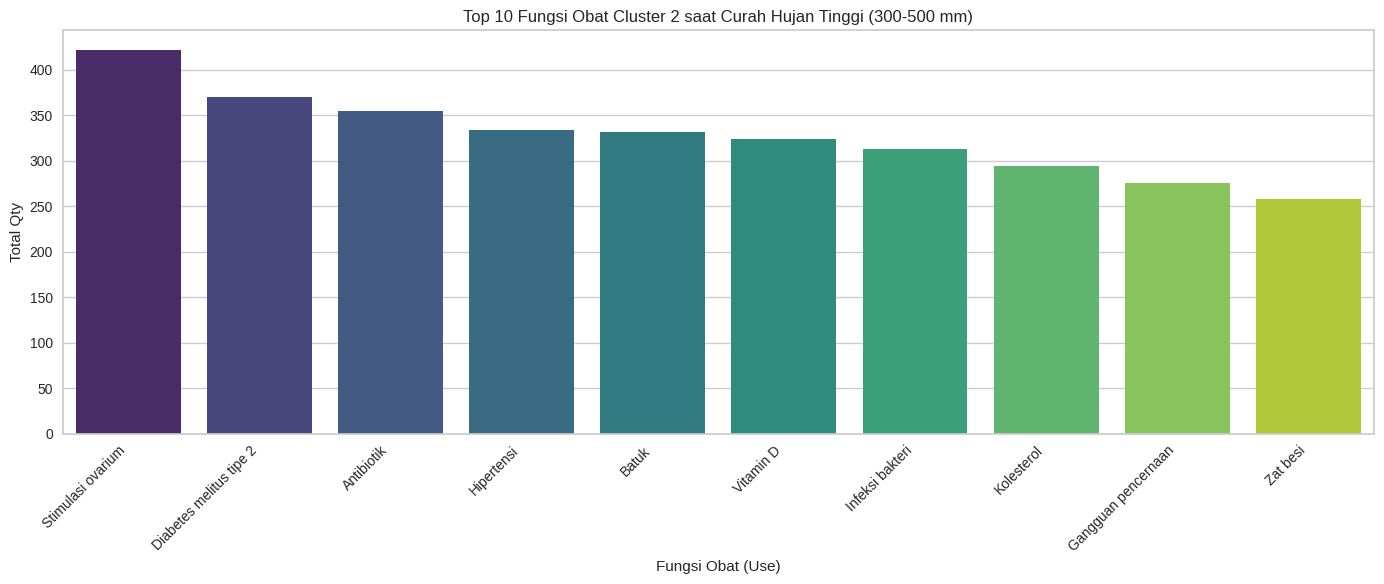

                         Use    Qty
158        Stimulasi ovarium  422.0
33   Diabetes melitus tipe 2  370.0
10                Antibiotik  354.0
58                Hipertensi  334.0
19                     Batuk  331.0
177                Vitamin D  324.0
67           Infeksi bakteri  313.0
86                Kolesterol  294.0
48       Gangguan pencernaan  275.0
180                 Zat besi  258.0


In [105]:
# Filter data untuk curah hujan 300-500 mm dan cluster 2
data_hujan_tinggi_cl2 = data_exploded[
    (data_exploded['RR_BULAN'] >= 300) & (data_exploded['RR_BULAN'] <= 500) &
    (data_exploded['Cluster'] == 2)
]

# Hitung total Qty per fungsi obat
use_qty_cl2 = (
    data_hujan_tinggi_cl2
    .groupby('Use')['Qty']
    .sum()
    .reset_index()
    .sort_values('Qty', ascending=False)
)

# Tampilkan top 10
top_use_hujan_tinggi_cl2 = use_qty_cl2.head(10)

# Plot
plt.figure(figsize=(14, 6))
sns.barplot(data=top_use_hujan_tinggi_cl2, x='Use', y='Qty', palette='viridis')
plt.title('Top 10 Fungsi Obat Cluster 2 saat Curah Hujan Tinggi (300-500 mm)')
plt.xlabel('Fungsi Obat (Use)')
plt.ylabel('Total Qty')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Cetak tabel hasil
print(top_use_hujan_tinggi_cl2)

In [106]:
# Inisialisasi list untuk menyimpan hasil
top3_item_supplier_per_use = []

# Loop setiap Use dari top 10
for use in top_use_hujan_tinggi_cl2['Use']:
    # Filter data sesuai use
    data_per_use = data_hujan_tinggi_cl2[data_hujan_tinggi_cl2['Use'] == use]

    # Group by Item dan Supplier, hitung total Qty
    item_supplier_qty = (
        data_per_use
        .groupby(['Item', 'Supplier'])
        ['Qty']
        .sum()
        .reset_index()
        .sort_values('Qty', ascending=False)
        .head(3)  # Ambil top 3
    )

    # Tambahkan kolom Use untuk identifikasi
    item_supplier_qty['Use'] = use

    # Tambahkan ke list
    top3_item_supplier_per_use.append(item_supplier_qty)

# Gabungkan semua hasil menjadi satu DataFrame
top3_item_supplier_df = pd.concat(top3_item_supplier_per_use, ignore_index=True)

# Tampilkan hasil
top3_item_supplier_df

,Item,Supplier,Qty,Use
0,PERGOVERIS 150 IU/75 IU,DEXA MEDICA,113.0,Stimulasi ovarium
1,PERGOVERIS 150 IU/75 IU,DIPA PHARMALAB,65.0,Stimulasi ovarium
2,PERGOVERIS 150 IU/75 IU,DARYA VARIA,60.0,Stimulasi ovarium
3,XIGDUO XR 10/1000 MG,ASTRA ZENECA,143.0,Diabetes melitus tipe 2
4,GLIMEPIRIDE 1 MG,OGB,60.0,Diabetes melitus tipe 2
5,LAPIGIM 2/500 MG,LAPI,40.0,Diabetes melitus tipe 2
6,DOXYCICLIN 100 MG,KIMIA FARMA,354.0,Antibiotik
7,LEPTICA 75 MG,DEXA MEDICA,120.0,Hipertensi
8,HCT 25 MG,OGB,35.0,Hipertensi
9,IRBESARTAN 300,OGB,30.0,Hipertensi


/tmp/ipython-input-107-2048328666.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_use_hujan_menengah_cl2, x='Use', y='Qty', palette='viridis')


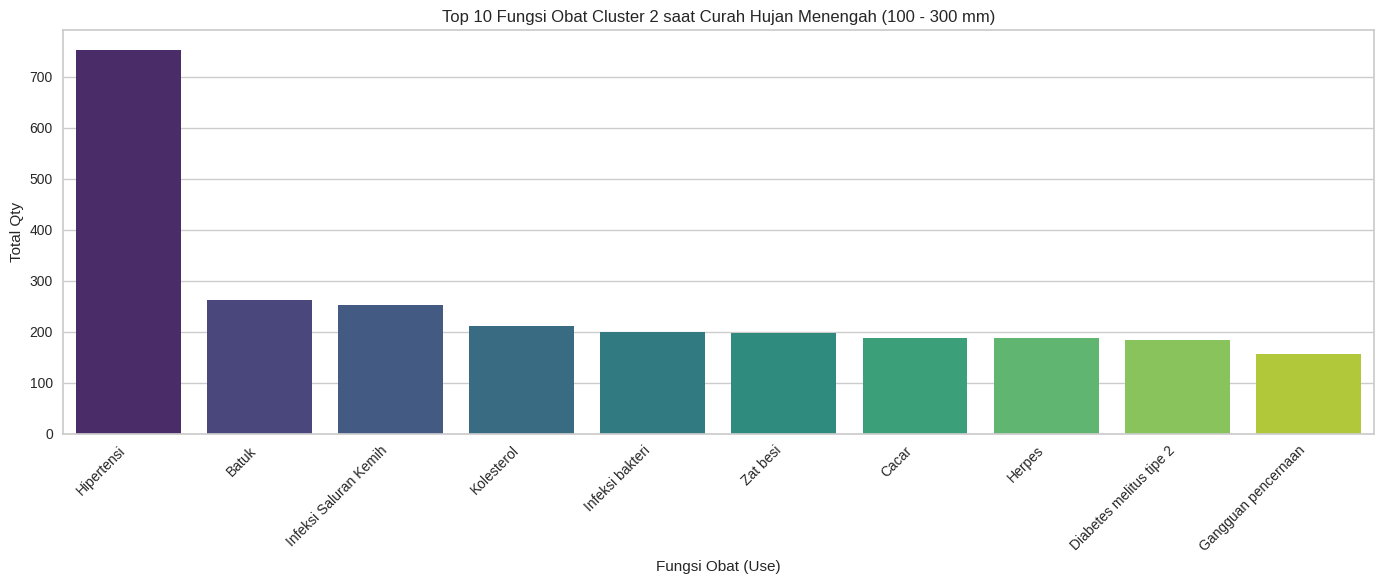

                         Use    Qty
69                Hipertensi  753.0
25                     Batuk  263.0
76     Infeksi Saluran Kemih  253.0
102               Kolesterol  212.0
78           Infeksi bakteri  199.0
197                 Zat besi  198.0
31                     Cacar  188.0
63                    Herpes  188.0
41   Diabetes melitus tipe 2  184.0
56       Gangguan pencernaan  157.0


In [107]:
# Filter data untuk curah hujan 100 - 300 mm dan cluster 2
data_hujan_menengah_cl2 = data_exploded[
   (data_exploded['RR_BULAN'] >= 100) & (data_exploded['RR_BULAN'] <= 300) &
    (data_exploded['Cluster'] == 2)
]

# Hitung total Qty per fungsi obat
use_qty_cl2 = (
    data_hujan_menengah_cl2
    .groupby('Use')['Qty']
    .sum()
    .reset_index()
    .sort_values('Qty', ascending=False)
)

# Tampilkan top 10
top_use_hujan_menengah_cl2 = use_qty_cl2.head(10)

# Plot
plt.figure(figsize=(14, 6))
sns.barplot(data=top_use_hujan_menengah_cl2, x='Use', y='Qty', palette='viridis')
plt.title('Top 10 Fungsi Obat Cluster 2 saat Curah Hujan Menengah (100 - 300 mm)')
plt.xlabel('Fungsi Obat (Use)')
plt.ylabel('Total Qty')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Cetak tabel hasil
print(top_use_hujan_menengah_cl2)

In [108]:
# Inisialisasi list untuk menyimpan hasil
top3_item_supplier_per_use = []

# Loop setiap Use dari top 10
for use in top_use_hujan_menengah_cl2['Use']:
    # Filter data sesuai use
    data_per_use = data_hujan_menengah_cl2[data_hujan_menengah_cl2['Use'] == use]

    # Group by Item dan Supplier, hitung total Qty
    item_supplier_qty = (
        data_per_use
        .groupby(['Item', 'Supplier'])
        ['Qty']
        .sum()
        .reset_index()
        .sort_values('Qty', ascending=False)
        .head(3)  # Ambil top 3
    )

    # Tambahkan kolom Use untuk identifikasi
    item_supplier_qty['Use'] = use

    # Tambahkan ke list
    top3_item_supplier_per_use.append(item_supplier_qty)

# Gabungkan semua hasil menjadi satu DataFrame
top3_item_supplier_df = pd.concat(top3_item_supplier_per_use, ignore_index=True)

# Tampilkan hasil
top3_item_supplier_df

,Item,Supplier,Qty,Use
0,LEPTICA 75 MG,DEXA MEDICA,200.0,Hipertensi
1,BIOPREXUM 5 MG,SERVIER,90.0,Hipertensi
2,"RAMIPRIL TAB 2,5MG",OGB,80.0,Hipertensi
3,ACETYLCYSTEINE CAPSUL,OGB,213.0,Batuk
4,PSIDII CAPS,DEXA MEDICA,23.0,Batuk
5,BISOLVON TAB 8 MG,BOEHRINGER INGELHEIM,10.0,Batuk
6,UROTRACTIN,SANBE FARMA,163.0,Infeksi Saluran Kemih
7,UROTRACTIN ( 60 CAP/BOX ),SANBE FARMA,70.0,Infeksi Saluran Kemih
8,PRIVE URICRAN PLUS 8 GR SACHET,COMBIPHAR,20.0,Infeksi Saluran Kemih
9,ROSTIN 20 MG TABLET,LAPI,120.0,Kolesterol


/tmp/ipython-input-109-1480350731.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_use_hujan_rendah_cl2, x='Use', y='Qty', palette='viridis')


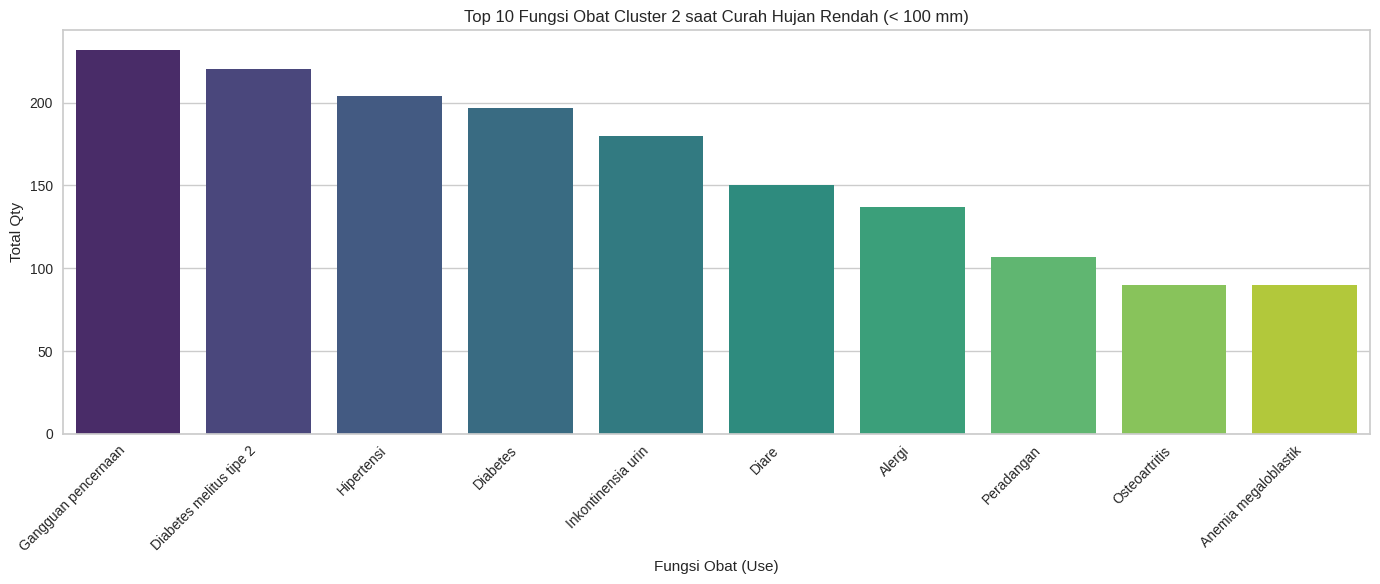

                         Use    Qty
43       Gangguan pencernaan  232.0
29   Diabetes melitus tipe 2  220.0
54                Hipertensi  204.0
26                  Diabetes  197.0
68        Inkontinensia urin  180.0
31                     Diare  150.0
0                     Alergi  137.0
131               Peradangan  107.0
117            Osteoartritis   90.0
1       Anemia megaloblastik   90.0


In [109]:
# Filter data untuk curah hujan < 100 mm dan cluster 2
data_hujan_rendah_cl2 = data_exploded[
    (data_exploded['RR_BULAN'] < 100) &
    (data_exploded['Cluster'] == 2)
]

# Hitung total Qty per fungsi obat
use_qty_cl2 = (
    data_hujan_rendah_cl2
    .groupby('Use')['Qty']
    .sum()
    .reset_index()
    .sort_values('Qty', ascending=False)
)

# Tampilkan top 10
top_use_hujan_rendah_cl2 = use_qty_cl2.head(10)

# Plot
plt.figure(figsize=(14, 6))
sns.barplot(data=top_use_hujan_rendah_cl2, x='Use', y='Qty', palette='viridis')
plt.title('Top 10 Fungsi Obat Cluster 2 saat Curah Hujan Rendah (< 100 mm)')
plt.xlabel('Fungsi Obat (Use)')
plt.ylabel('Total Qty')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Cetak tabel hasil
print(top_use_hujan_rendah_cl2)

In [110]:
# Inisialisasi list untuk menyimpan hasil
top3_item_supplier_per_use = []

# Loop setiap Use dari top 10
for use in top_use_hujan_rendah_cl2['Use']:
    # Filter data sesuai use
    data_per_use = data_hujan_rendah_cl2[data_hujan_rendah_cl2['Use'] == use]

    # Group by Item dan Supplier, hitung total Qty
    item_supplier_qty = (
        data_per_use
        .groupby(['Item', 'Supplier'])
        ['Qty']
        .sum()
        .reset_index()
        .sort_values('Qty', ascending=False)
        .head(3)  # Ambil top 3
    )

    # Tambahkan kolom Use untuk identifikasi
    item_supplier_qty['Use'] = use

    # Tambahkan ke list
    top3_item_supplier_per_use.append(item_supplier_qty)

# Gabungkan semua hasil menjadi satu DataFrame
top3_item_supplier_df = pd.concat(top3_item_supplier_per_use, ignore_index=True)

# Tampilkan hasil
top3_item_supplier_df

,Item,Supplier,Qty,Use
0,LACTRIN KAPSUL,LAPI,120.0,Gangguan pencernaan
1,SISTENOL,DEXA MEDICA,64.0,Gangguan pencernaan
2,KRILI CAPSUL LUNAK,DIPA PHARMALAB,30.0,Gangguan pencernaan
3,"TRAJENTA DUO 2,5MG/850MG",BOEHRINGER INGELHEIM,120.0,Diabetes melitus tipe 2
4,JARDIANCE DUO 5 MG/500 MG,BOEHRINGER INGELHEIM,30.0,Diabetes melitus tipe 2
5,JANUMET XR 100/1000 MG,MSD,28.0,Diabetes melitus tipe 2
6,"RAMIPRIL TAB 2,5MG",OGB,40.0,Hipertensi
7,CAPTOPRIL 25 MG,OGB,38.0,Hipertensi
8,CONBIS 5MG,LAPI,30.0,Hipertensi
9,ACARBOSE 50 MG TAB,OGB,150.0,Diabetes


## **Analisis Curah Hujan Cluster 3**

/tmp/ipython-input-111-344027507.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_use_hujan_sangattinggi_cl3, x='Use', y='Qty', palette='viridis')


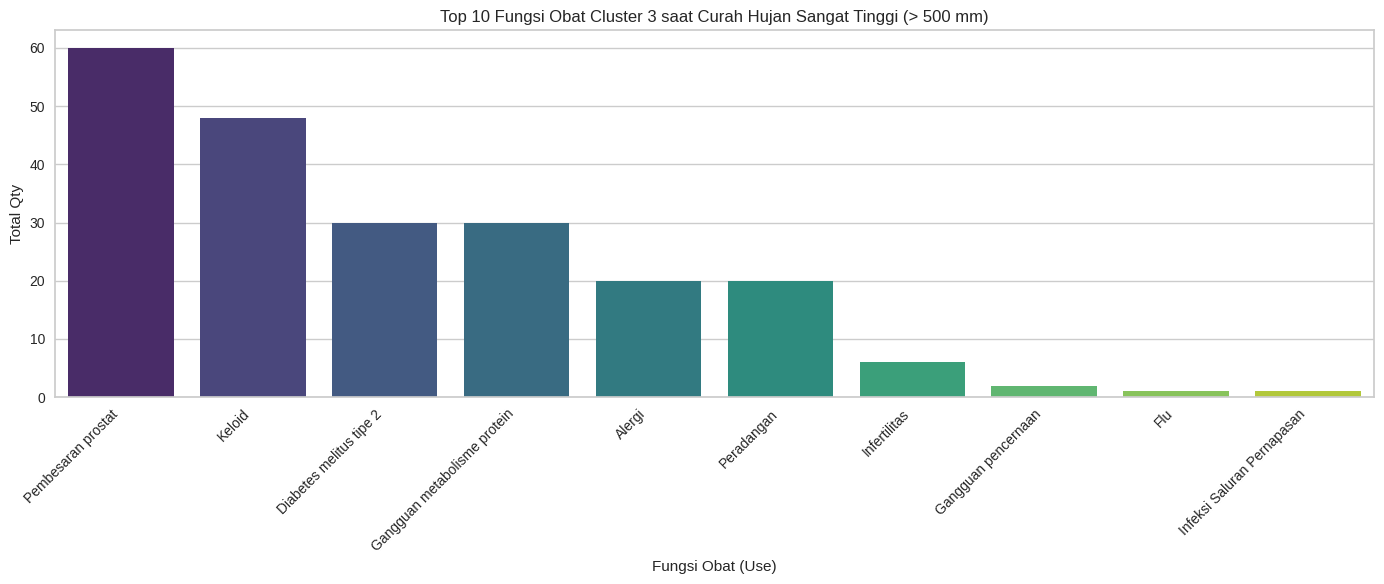

                             Use   Qty
12            Pembesaran prostat  60.0
9                         Keloid  48.0
3        Diabetes melitus tipe 2  30.0
5   Gangguan metabolisme protein  30.0
0                         Alergi  20.0
13                    Peradangan  20.0
8                   Infertilitas   6.0
6            Gangguan pencernaan   2.0
4                            Flu   1.0
7     Infeksi Saluran Pernapasan   1.0


In [111]:
# Filter data untuk curah hujan > 500 mm dan cluster 3
data_hujan_sangattinggi_cl3 = data_exploded[
    (data_exploded['RR_BULAN'] > 500) &
    (data_exploded['Cluster'] == 3)
]

# Hitung total Qty per fungsi obat
use_qty_cl3 = (
    data_hujan_sangattinggi_cl3
    .groupby('Use')['Qty']
    .sum()
    .reset_index()
    .sort_values('Qty', ascending=False)
)

# Tampilkan top 10
top_use_hujan_sangattinggi_cl3 = use_qty_cl3.head(10)

# Plot
plt.figure(figsize=(14, 6))
sns.barplot(data=top_use_hujan_sangattinggi_cl3, x='Use', y='Qty', palette='viridis')
plt.title('Top 10 Fungsi Obat Cluster 3 saat Curah Hujan Sangat Tinggi (> 500 mm)')
plt.xlabel('Fungsi Obat (Use)')
plt.ylabel('Total Qty')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Cetak tabel hasil
print(top_use_hujan_sangattinggi_cl3)

In [112]:
# Inisialisasi list untuk menyimpan hasil
top3_item_supplier_per_use = []

# Loop setiap Use dari top 10
for use in top_use_hujan_sangattinggi_cl3['Use']:
    # Filter data sesuai use
    data_per_use = data_hujan_sangattinggi_cl3[data_hujan_sangattinggi_cl3['Use'] == use]

    # Group by Item dan Supplier, hitung total Qty
    item_supplier_qty = (
        data_per_use
        .groupby(['Item', 'Supplier'])
        ['Qty']
        .sum()
        .reset_index()
        .sort_values('Qty', ascending=False)
        .head(3)  # Ambil top 3
    )

    # Tambahkan kolom Use untuk identifikasi
    item_supplier_qty['Use'] = use

    # Tambahkan ke list
    top3_item_supplier_per_use.append(item_supplier_qty)

# Gabungkan semua hasil menjadi satu DataFrame
top3_item_supplier_df = pd.concat(top3_item_supplier_per_use, ignore_index=True)

# Tampilkan hasil
top3_item_supplier_df

,Item,Supplier,Qty,Use
0,URIEF 4 MG,EISAI,60.0,Pembesaran prostat
1,LANAKELOID TAB 30MG,LANDSON,48.0,Keloid
2,JARDIANCE DUO 12.5 MG/1000 MG,BOEHRINGER INGELHEIM,30.0,Diabetes melitus tipe 2
3,KETOSTERIL TABLET,FRESENIUS,30.0,Gangguan metabolisme protein
4,TISON 4MG,LANDSON,20.0,Alergi
5,TISON 4MG,LANDSON,20.0,Peradangan
6,GONAL F PEN 150 IU,MERCK,6.0,Infertilitas
7,INPEPSA SYRUP 200 ML,FAHRENHEIT,2.0,Gangguan pencernaan
8,DISUDRIN DROP,DARYA VARIA,1.0,Flu
9,CEFAT SYRUP 125 MG (60ML),SANBE FARMA,1.0,Infeksi Saluran Pernapasan


/tmp/ipython-input-113-635035014.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_use_hujan_tinggi_cl3, x='Use', y='Qty', palette='viridis')


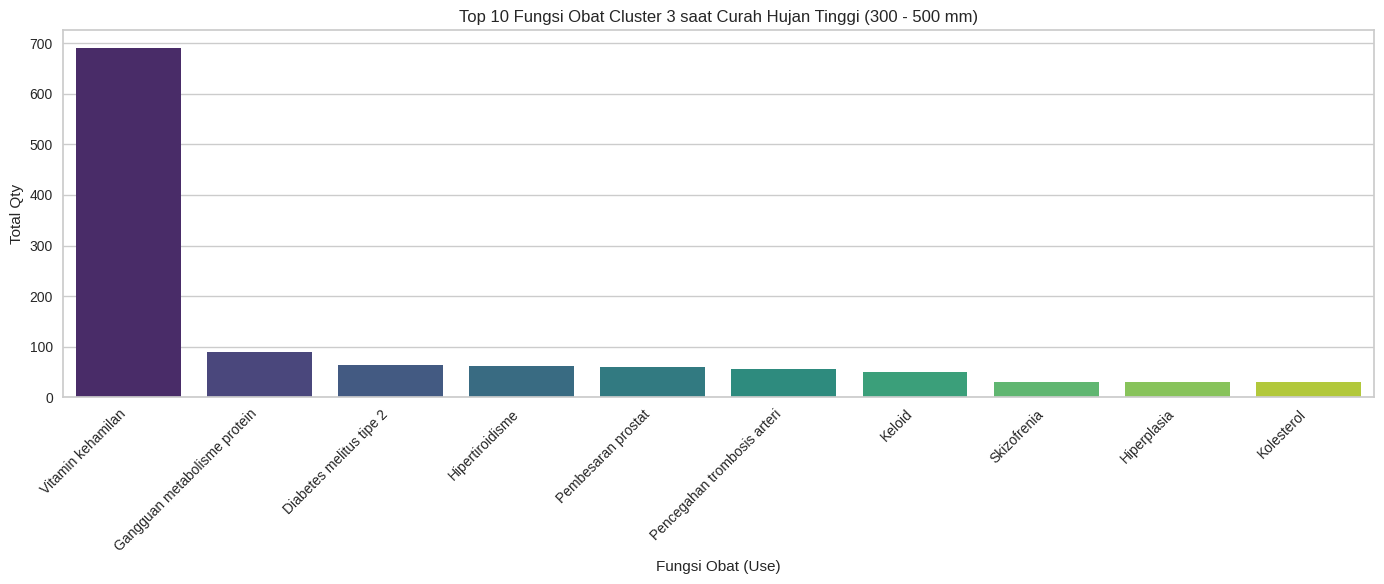

                             Use    Qty
28             Vitamin kehamilan  691.0
5   Gangguan metabolisme protein   90.0
3        Diabetes melitus tipe 2   64.0
8                Hipertiroidisme   61.0
17            Pembesaran prostat   60.0
18   Pencegahan trombosis arteri   56.0
13                        Keloid   50.0
23                   Skizofrenia   30.0
7                    Hiperplasia   30.0
14                    Kolesterol   30.0


In [113]:
# Filter data untuk curah hujan > 300 mm dan cluster 3
data_hujan_tinggi_cl3 = data_exploded[
    (data_exploded['RR_BULAN'] >= 300) & (data_exploded['RR_BULAN'] <= 500) &
    (data_exploded['Cluster'] == 3)
]

# Hitung total Qty per fungsi obat
use_qty_cl3 = (
    data_hujan_tinggi_cl3
    .groupby('Use')['Qty']
    .sum()
    .reset_index()
    .sort_values('Qty', ascending=False)
)

# Tampilkan top 10
top_use_hujan_tinggi_cl3 = use_qty_cl3.head(10)

# Plot
plt.figure(figsize=(14, 6))
sns.barplot(data=top_use_hujan_tinggi_cl3, x='Use', y='Qty', palette='viridis')
plt.title('Top 10 Fungsi Obat Cluster 3 saat Curah Hujan Tinggi (300 - 500 mm)')
plt.xlabel('Fungsi Obat (Use)')
plt.ylabel('Total Qty')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Cetak tabel hasil
print(top_use_hujan_tinggi_cl3)

In [114]:
# Inisialisasi list untuk menyimpan hasil
top3_item_supplier_per_use = []

# Loop setiap Use dari top 10
for use in top_use_hujan_tinggi_cl3['Use']:
    # Filter data sesuai use
    data_per_use = data_hujan_tinggi_cl3[data_hujan_tinggi_cl3['Use'] == use]

    # Group by Item dan Supplier, hitung total Qty
    item_supplier_qty = (
        data_per_use
        .groupby(['Item', 'Supplier'])
        ['Qty']
        .sum()
        .reset_index()
        .sort_values('Qty', ascending=False)
        .head(3)  # Ambil top 3
    )

    # Tambahkan kolom Use untuk identifikasi
    item_supplier_qty['Use'] = use

    # Tambahkan ke list
    top3_item_supplier_per_use.append(item_supplier_qty)

# Gabungkan semua hasil menjadi satu DataFrame
top3_item_supplier_df = pd.concat(top3_item_supplier_per_use, ignore_index=True)

# Tampilkan hasil
top3_item_supplier_df

,Item,Supplier,Qty,Use
0,FOLAMIL CAP,DEXA MEDICA,691.0,Vitamin kehamilan
1,KETOSTERIL TABLET,FRESENIUS,90.0,Gangguan metabolisme protein
2,JARDIANCE 10 MG,BOEHRINGER INGELHEIM,30.0,Diabetes melitus tipe 2
3,JARDIANCE DUO 12.5 MG/1000 MG,BOEHRINGER INGELHEIM,30.0,Diabetes melitus tipe 2
4,TRULICITY 1.5 MG/0.5 ML,ELI LILLY,4.0,Diabetes melitus tipe 2
5,THYROZOL 10 MG,MERCK,61.0,Hipertiroidisme
6,URIEF 4 MG,EISAI,60.0,Pembesaran prostat
7,PLATOGRIX 75MG,SANOFI,56.0,Pencegahan trombosis arteri
8,LANAKELOID TAB 30MG,LANDSON,50.0,Keloid
9,METRIX 2 MG TAB,KALBE FARMA,30.0,Skizofrenia


/tmp/ipython-input-115-2332586709.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_use_hujan_menengah_cl3, x='Use', y='Qty', palette='viridis')


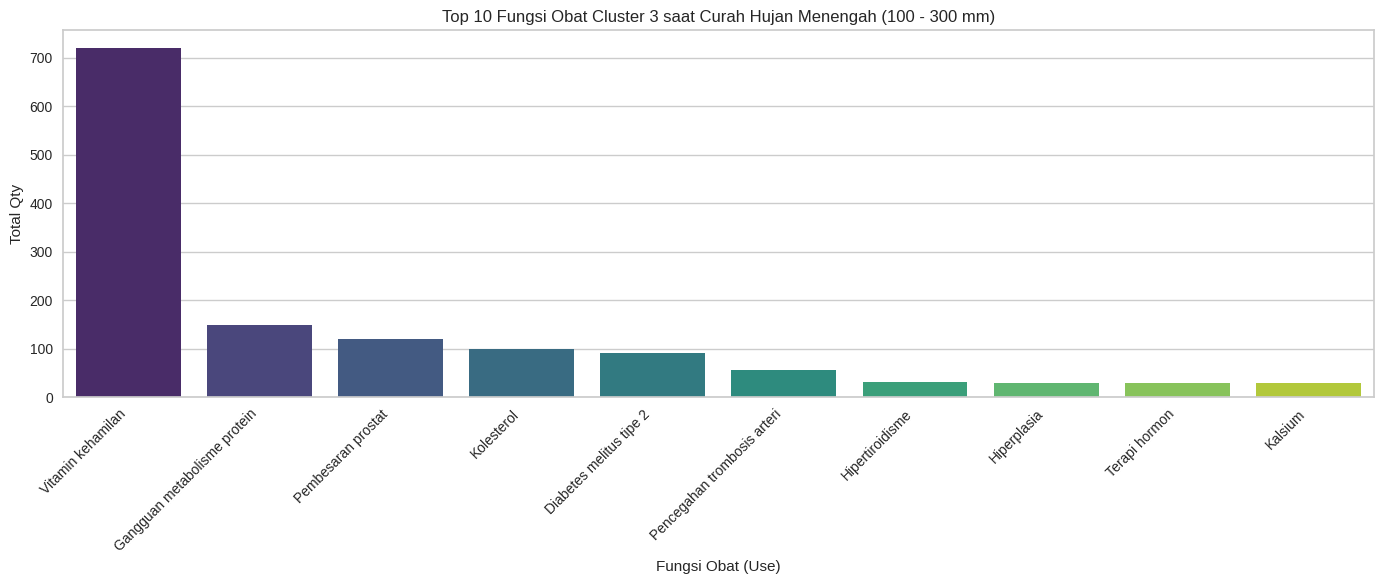

                             Use    Qty
39             Vitamin kehamilan  721.0
10  Gangguan metabolisme protein  150.0
26            Pembesaran prostat  120.0
20                    Kolesterol  100.0
7        Diabetes melitus tipe 2   92.0
28   Pencegahan trombosis arteri   56.0
15               Hipertiroidisme   31.0
14                   Hiperplasia   30.0
34                 Terapi hormon   30.0
19                       Kalsium   30.0


In [115]:
# Filter data untuk curah hujan 100 - 300 mm dan cluster 3
data_hujan_menengah_cl3= data_exploded[
   (data_exploded['RR_BULAN'] >= 100) & (data_exploded['RR_BULAN'] <= 300) &
    (data_exploded['Cluster'] == 3)
]

# Hitung total Qty per fungsi obat
use_qty_cl3 = (
    data_hujan_menengah_cl3
    .groupby('Use')['Qty']
    .sum()
    .reset_index()
    .sort_values('Qty', ascending=False)
)

# Tampilkan top 10
top_use_hujan_menengah_cl3 = use_qty_cl3.head(10)

# Plot
plt.figure(figsize=(14, 6))
sns.barplot(data=top_use_hujan_menengah_cl3, x='Use', y='Qty', palette='viridis')
plt.title('Top 10 Fungsi Obat Cluster 3 saat Curah Hujan Menengah (100 - 300 mm)')
plt.xlabel('Fungsi Obat (Use)')
plt.ylabel('Total Qty')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Cetak tabel hasil
print(top_use_hujan_menengah_cl3)

In [116]:
# Inisialisasi list untuk menyimpan hasil
top3_item_supplier_per_use = []

# Loop setiap Use dari top 10
for use in top_use_hujan_menengah_cl3['Use']:
    # Filter data sesuai use
    data_per_use = data_hujan_menengah_cl3[data_hujan_menengah_cl3['Use'] == use]

    # Group by Item dan Supplier, hitung total Qty
    item_supplier_qty = (
        data_per_use
        .groupby(['Item', 'Supplier'])
        ['Qty']
        .sum()
        .reset_index()
        .sort_values('Qty', ascending=False)
        .head(3)  # Ambil top 3
    )

    # Tambahkan kolom Use untuk identifikasi
    item_supplier_qty['Use'] = use

    # Tambahkan ke list
    top3_item_supplier_per_use.append(item_supplier_qty)

# Gabungkan semua hasil menjadi satu DataFrame
top3_item_supplier_df = pd.concat(top3_item_supplier_per_use, ignore_index=True)

# Tampilkan hasil
top3_item_supplier_df

,Item,Supplier,Qty,Use
0,FOLAMIL CAP,DEXA MEDICA,721.0,Vitamin kehamilan
1,KETOSTERIL TABLET,FRESENIUS,150.0,Gangguan metabolisme protein
2,URIEF 4 MG,EISAI,120.0,Pembesaran prostat
3,ATORVASTATIN 40 MG,OGB,100.0,Kolesterol
4,FORXIGA 5 MG ( 30 CAP/BOX ),ASTRA ZENECA,60.0,Diabetes melitus tipe 2
5,JARDIANCE DUO 12.5 MG/1000 MG,BOEHRINGER INGELHEIM,30.0,Diabetes melitus tipe 2
6,TRULICITY 1.5 MG/0.5 ML,ELI LILLY,2.0,Diabetes melitus tipe 2
7,PLATOGRIX 75MG,SANOFI,56.0,Pencegahan trombosis arteri
8,THYROZOL 10 MG,MERCK,31.0,Hipertiroidisme
9,DUODART CAP,GLAXO SMITH KLINE,30.0,Hiperplasia


/tmp/ipython-input-117-2595151422.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_use_hujan_rendah_cl3, x='Use', y='Qty', palette='viridis')


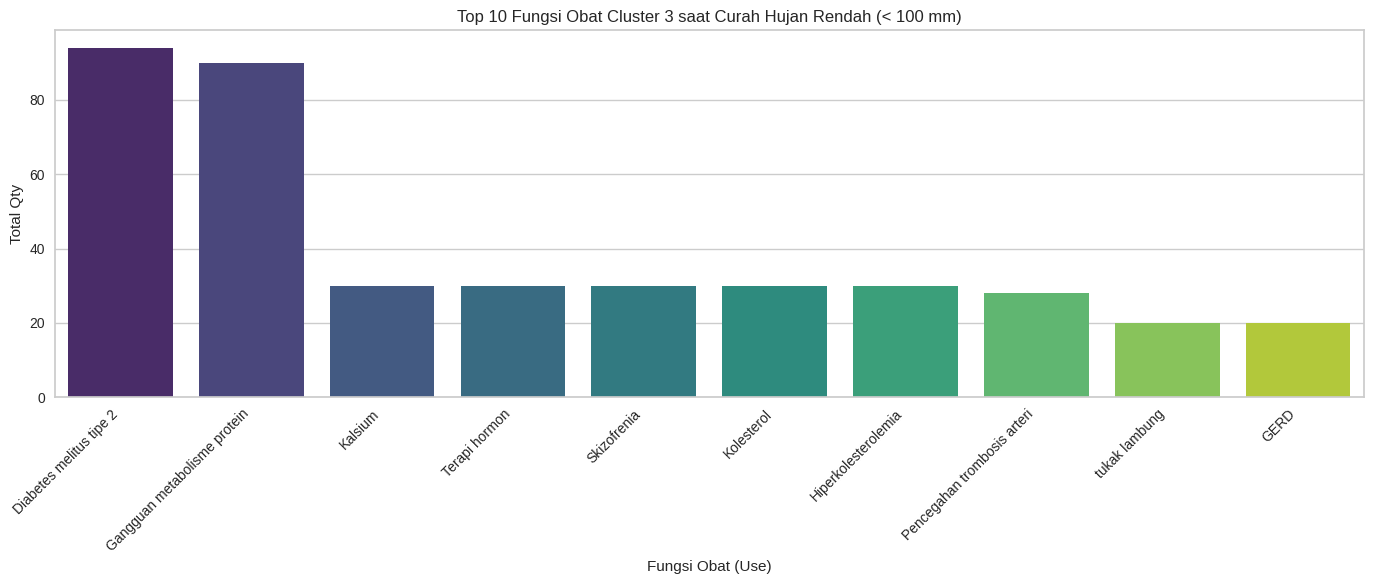

                             Use   Qty
5        Diabetes melitus tipe 2  94.0
7   Gangguan metabolisme protein  90.0
9                        Kalsium  30.0
16                 Terapi hormon  30.0
15                   Skizofrenia  30.0
10                    Kolesterol  30.0
8            Hiperkolesterolemia  30.0
12   Pencegahan trombosis arteri  28.0
23                 tukak lambung  20.0
6                           GERD  20.0


In [117]:
# Filter data untuk curah hujan < 100 mm dan cluster 3
data_hujan_rendah_cl3 = data_exploded[
    (data_exploded['RR_BULAN'] < 100) &
    (data_exploded['Cluster'] == 3)
]

# Hitung total Qty per fungsi obat
use_qty_cl3 = (
    data_hujan_rendah_cl3
    .groupby('Use')['Qty']
    .sum()
    .reset_index()
    .sort_values('Qty', ascending=False)
)

# Tampilkan top 10
top_use_hujan_rendah_cl3 = use_qty_cl3.head(10)

# Plot
plt.figure(figsize=(14, 6))
sns.barplot(data=top_use_hujan_rendah_cl3, x='Use', y='Qty', palette='viridis')
plt.title('Top 10 Fungsi Obat Cluster 3 saat Curah Hujan Rendah (< 100 mm)')
plt.xlabel('Fungsi Obat (Use)')
plt.ylabel('Total Qty')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Cetak tabel hasil
print(top_use_hujan_rendah_cl3)

In [118]:
# Inisialisasi list untuk menyimpan hasil
top3_item_supplier_per_use = []

# Loop setiap Use dari top 10
for use in top_use_hujan_rendah_cl3['Use']:
    # Filter data sesuai use
    data_per_use = data_hujan_rendah_cl3[data_hujan_rendah_cl3['Use'] == use]

    # Group by Item dan Supplier, hitung total Qty
    item_supplier_qty = (
        data_per_use
        .groupby(['Item', 'Supplier'])
        ['Qty']
        .sum()
        .reset_index()
        .sort_values('Qty', ascending=False)
        .head(3)  # Ambil top 3
    )

    # Tambahkan kolom Use untuk identifikasi
    item_supplier_qty['Use'] = use

    # Tambahkan ke list
    top3_item_supplier_per_use.append(item_supplier_qty)

# Gabungkan semua hasil menjadi satu DataFrame
top3_item_supplier_df = pd.concat(top3_item_supplier_per_use, ignore_index=True)

# Tampilkan hasil
top3_item_supplier_df

,Item,Supplier,Qty,Use
0,JARDIANCE 10 MG,BOEHRINGER INGELHEIM,60.0,Diabetes melitus tipe 2
1,JARDIANCE DUO 12.5 MG/1000 MG,BOEHRINGER INGELHEIM,30.0,Diabetes melitus tipe 2
2,TRULICITY 1.5 MG/0.5 ML,ELI LILLY,4.0,Diabetes melitus tipe 2
3,KETOSTERIL TABLET,FRESENIUS,90.0,Gangguan metabolisme protein
4,CALNIC PLUS CHEWABLE TAB,GRACIA,30.0,Kalsium
5,ANDROGEL,PT. BESINS,30.0,Terapi hormon
6,METRIX 2 MG TAB,KALBE FARMA,30.0,Skizofrenia
7,ATOZET 10/20,MERCK,30.0,Kolesterol
8,FENOFIBRATE 200 MG,OGB,30.0,Hiperkolesterolemia
9,PLATOGRIX 75MG,SANOFI,28.0,Pencegahan trombosis arteri
